# Librerias

In [1]:
import sklearn.mixture
import sklearn.feature_extraction.text
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize
import tqdm

### Library versions:
| library name   | library version |
|----------------|-----------------|
| `sklearn`      |   1.0.2         |
| `numpy`        |   1.21.6        |
| `scipy`        |   1.6.3         |
| `pandas`       |   1.3.5         |
| `matplotlib`   |   3.4           |
| `seaborn`      |   0.11.2        |

In [2]:
#plt.ioff()
curr_path=os.getcwd()
base_list=curr_path.split(os.sep)[:-1];
base_path_list=[elem+os.sep for elem in base_list]
base_path=''.join(base_path_list)

phenotypic_path=Path(base_path+'csv-fenotipico')
characterization_path=Path(base_path+'Caracterizaciones')

## Abriendo csv's

In [3]:
phen_csv=pd.read_csv(phenotypic_path/'Table_new_cols.csv')
null_phen_csv=phen_csv[pd.isnull(phen_csv['DSM_IV_TR'])]
subjects_DSM_null=pd.unique(null_phen_csv['SUB_ID'])

#subjects_phen_csv=phen_csv['SUB_ID'].values
phen_csv.head()

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
0,29006,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,48.0,1.0,NaN
1,29007,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,41.0,1.0,NaN
2,29008,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,59.0,1.0,NaN
3,29009,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,57.0,1.0,NaN
4,29010,BNI_1,ABIDE-II,1,1,Barrow Neurological Institute,PHILIPS Ingenia,3T,1.1x1.1x1.2,45.0,1.0,NaN


In [4]:
sample = "adolescents"

In [5]:
char_csv=pd.read_csv(characterization_path/'21-apr-2021'/f'curvelet_abide_{sample}_sample_male_axial.csv')
bad_log_csv=pd.read_csv(characterization_path/'21-apr-2021'/f'curvelet_abide_{sample}_sample_male_axial-bad-log.csv', na_filter= False)
discard_q_csv=pd.read_csv('discard-q.csv')

In [6]:
display(discard_q_csv)

,ID
0,50133
1,50136
2,50185
3,50192
4,50197
5,50272
6,50273
7,50274
8,50276
9,50277


In [7]:
discarded_quality_b = pd.read_csv(Path(base_path)/'discarded_subjects_quality'/'ABIDE_CHECK_VISUAL - Quality ABIDE.csv')
discarded_quality_b["SUBJECT_ID"] = [int(center.split("_")[-1]) for center in discarded_quality_b["CENTER"].values]
discarded_quality_b.head()

,CENTER,GROUP,DX_GROUP,SUBJECT_ID
0,KKI_50815,CHILDREN,1,50815
1,MaxMun_51352,CHILDREN,1,51352
2,MaxMun_51353,CHILDREN,1,51353
3,Olin_50122,CHILDREN,1,50122
4,Olin_50133,CHILDREN,1,50133


In [8]:
phen_csv[phen_csv['SUB_ID'].isin(discarded_quality_b['SUBJECT_ID'].values)]

,SUB_ID,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,HANDEDNESS_CATEGORY,DSM_IV_TR
154,28764,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.608219,2.0,3.0
162,28782,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.016438,1.0,3.0
171,28799,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,8.931507,1.0,1.0
173,28802,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.304110,1.0,2.0
181,28816,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.621918,1.0,2.0
183,28818,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,12.624658,1.0,1.0
188,28823,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,9.183562,1.0,1.0
227,28781,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,10.687671,1.0,0.0
233,28794,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,11.468493,2.0,0.0
290,29599,IP_1,ABIDE-II,2,1,Institut Pasteur and Robert Debr? Hospital,PHILIPS Achieva,1.5T,1.0x1.0x1.0,10.150000,1.0,0.0


In [9]:
char_csv.head()

,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,curv_234,curv_235,curv_236,curv_237,curv_238,curv_239,curv_240,curv_241,curv_242,curv_243
0,1.0,Left Frontal Pole,29030.0,1.0,ABIDE-II,BNI_1,18.0,0.002218,0.239192,1.893837,...,4.732619e-20,0.000249,0.289745,8.206776e-21,0.000216,0.289921,0.000232,0.000188,0.293361,-2.041679e-09
1,2.0,Right Frontal Pole,29030.0,1.0,ABIDE-II,BNI_1,18.0,0.010585,0.277301,2.043895,...,3.358954e-20,0.000315,0.299673,9.256019e-20,0.000255,0.299252,-0.000027,0.000200,0.296754,-2.843851e-08
2,3.0,Left Insular Cortex,29030.0,1.0,ABIDE-II,BNI_1,18.0,0.545601,0.562026,2.183168,...,-8.788535e-19,0.004051,0.470659,2.082458e-19,0.004599,0.491268,0.000412,0.004157,0.490921,-1.257240e-10
3,4.0,Right Insular Cortex,29030.0,1.0,ABIDE-II,BNI_1,18.0,1.497987,0.692691,2.869928,...,6.420044e-19,0.009137,0.536446,-1.463055e-19,0.010172,0.554233,-0.000261,0.010945,0.567998,4.345321e-06
4,5.0,Left Superior Frontal Gyrus,29030.0,1.0,ABIDE-II,BNI_1,18.0,0.316008,0.508874,1.868718,...,-6.426700e-19,0.003472,0.462542,-7.334829e-20,0.002846,0.455892,0.000231,0.001642,0.423672,1.859952e-08


In [10]:
len(np.unique(char_csv['subject_id'].values))

462

In [11]:
display(bad_log_csv)

,bad_log_cell1,bad_log_cell2,bad_log_cell3,bad_log_cell4
0,characterization issue on region 99,50984,NYU,ABIDE-I
1,characterization issue on region 74,50327,UM,ABIDE-I


In [12]:
char_csv=char_csv.dropna()
discarded_subjects=bad_log_csv['bad_log_cell2'].values.tolist()+discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()
print(discarded_subjects)

for subject in discarded_subjects:
    char_csv=char_csv.query('subject_id!=@subject')

#char_csv=char_csv[~char_csv.subject_id.isin(subjects_DSM_null)]
    
regions=pd.unique(char_csv['region_name'])
region_idx=pd.unique(char_csv['region_index'])


regions_dataframe=pd.DataFrame(data={'index':region_idx, 'region':regions}).set_index('index')
pd.options.display.max_rows=200
display(regions_dataframe)

#region_list=['Left Amygdala', 'Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
#             'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
#             'Right Cingulate Gyrus, anterior division', 'Left Superior Temporal Gyrus, anterior division', 
#             'Left Supracalcarine Cortex', 
#             'Right Temporal Fusiform Cortex, anterior division',
#            'Right Supramarginal Gyrus, anterior division',
#            'Left Angular Gyrus',
#            'Left Juxtapositional Lobule Cortex']

#region_list=['Right Amygdala', 'Left Frontal Pole', 'Right Frontal Pole', 
           #  'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 'Left Cingulate Gyrus, anterior division', 
            # 'Right Cingulate Gyrus, anterior division']

#region_idx=[106,116,1,2,49,50,57,58,17,93,74,38,41,51]

#region_list=['left frontal medial cortex']
#region_idx=[49]

region_idx, region_list = zip(*[(k,v) for k,v in regions_dataframe.to_dict()['region'].items()])

[50984, 50327, 50133, 50136, 50185, 50192, 50197, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50309, 50327, 50328, 51213, 51296, 51353, 50815, 51352, 51353, 50122, 50133, 50136, 51213, 51296, 51312, 51314, 50272, 50273, 50274, 50276, 50277, 50283, 50287, 50288, 50299, 50303, 50313, 50317, 50322, 50323, 50327, 50328, 50371, 50618, 28764, 28781, 28782, 28794, 28799, 28802, 28816, 28818, 28823, 29599, 29398, 29102, 29741, 29742, 29751]


,region
index,
1.0,Left Frontal Pole
2.0,Right Frontal Pole
3.0,Left Insular Cortex
4.0,Right Insular Cortex
5.0,Left Superior Frontal Gyrus
6.0,Right Superior Frontal Gyrus
7.0,Left Middle Frontal Gyrus
8.0,Right Middle Frontal Gyrus
9.0,Left Inferior Frontal Gyrus (pars triangularis)


In [13]:
def get_feature_number(i):
    features={'alphas':np.arange(243)[0::3], 'betas':np.arange(243)[1::3], 'mu':np.arange(243)[2::3]}
    if np.isin(i, features['alphas']):
        return ['alpha', np.where(features['alphas']==i)[0]+1]
    if np.isin(i, features['betas']):
        return ['beta', np.where(features['betas']==i)[0]+1]
    if np.isin(i, features['mu']):
        return ['mu', np.where(features['mu']==i)[0]+1]

In [14]:
c_u=[['#002626ff', '#0e4749ff', '#95c623ff', '#e55812ff', '#efe7daff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff'],
['#2191fbff','#ba274aff','#841c26ff','#b2ece1ff','#8cdedcff'],
['#0081a7ff','#00afb9ff','#f07167ff','#fed9b7ff','#fdfcdcff'],
['#ba2d0bff','#d5f2e3ff','#73ba9bff','#003e1fff','#01110aff'],
['#de541eff','#494331ff','#d6d6b1ff','#878472ff','#3f3f37ff'],
['#7ebdc2ff','#bb4430ff','#f3dfa2ff','#efe6ddff','#231f20ff'],
['#3a4f41ff', '#b9314fff', '#d5a18eff', '#dec3beff', '#e1dee3ff'],
['#119da4ff', '#0c7489ff', '#13505bff', '#040404ff', '#d7d9ceff'],
['#ffb997ff','#f67e7dff','#843b62ff','#0b032dff','#74546aff'],
['#c9cba3ff','#ffe1a8ff','#e26d5cff','#723d46ff','#472d30ff']]

c_i=[['#95c623', '#e55812'], 
        ['#0A2463', '#D8315B'],
        ['#377771', '#ED6A5E'],
        ['#D00000', '#136F63'],
        ['#E5446D', '#706C61'],
        ['#70163C', '#307351'],
        ['#311847', '#E03616'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9'],
        ['#9C0D38', '#243119'],
        ['#f07167', '#00afb9'],
        ['#b9314f', '#8ec75f'],
        ['#494331', '#71c6d9']]

colors = [c_i[m] for m in np.random.choice(a=np.arange(len(c_i)), size=len(region_idx), replace=True)]

In [15]:
def cluster_data(feature_matrix, n_components):
    #clustering_model=sklearn.mixture.BayesianGaussianMixture(n_components=n_components, max_iter=1000, 
    #                                                            init_params='kmeans', weight_concentration_prior_type='dirichlet_process')
    clustering_model=sklearn.cluster.KMeans(n_clusters=n_components)
    features_prep=(feature_matrix-np.mean(feature_matrix))/np.var(feature_matrix)
    clustering_model.fit(features_prep)
    return clustering_model.predict(features_prep)

## Bullseye plot code

In [16]:
def bulls_eye(ax, data, cmap=None, norm=None, raidal_subdivisions=(2, 8, 8, 11),
              centered=(True, False, False, True), add_nomenclatures=True, cell_resolution=128,
              pfi_where_to_save=None, colors_bound='-k'):
    """
    Clockwise, from smaller radius to bigger radius.
    :param ax:
    :param data:
    :param cmap:
    :param norm:
    :param raidal_subdivisions:
    :param centered:
    :param add_nomenclatures:
    :param cell_resolution:
    :param pfi_where_to_save:
    :return:
    """
    line_width = 1.5
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2*np.pi, 768)
    r = np.linspace(0, 1, len(raidal_subdivisions)+1)

    nomenclatures = []
    if isinstance(add_nomenclatures, bool):
        if add_nomenclatures:
            nomenclatures = range(1, sum(raidal_subdivisions)+1)
    elif isinstance(add_nomenclatures, list) or isinstance(add_nomenclatures, tuple):
        assert len(add_nomenclatures) == sum(raidal_subdivisions)
        nomenclatures = add_nomenclatures[:]
        add_nomenclatures = True


    # Create the circular bounds
    line_width_circular = line_width
    for i in range(r.shape[0]):
        if i == range(r.shape[0])[-1]:
            line_width_circular = int(line_width / 2.)
        ax.plot(theta, np.repeat(r[i], theta.shape), colors_bound, lw=line_width_circular)

    # iterate over cells divided by radial subdivision
    for rs_id, rs in enumerate(raidal_subdivisions):
        for i in range(rs):
            cell_id = sum(raidal_subdivisions[:rs_id]) + i
            theta_i = - i * 2 * np.pi / rs + np.pi / 2
            if not centered[rs_id]:
                theta_i += (2 * np.pi / rs) / 2
            theta_i_plus_one = theta_i - 2 * np.pi / rs  # clockwise
            # Create colour fillings for each cell:
            theta_interval = np.linspace(theta_i, theta_i_plus_one, cell_resolution)
            r_interval = np.array([r[rs_id], r[rs_id+1]])
            angle  = np.repeat(theta_interval[:, np.newaxis], 2, axis=1)
            radius = np.repeat(r_interval[:, np.newaxis], cell_resolution, axis=1).T
            z = np.ones((cell_resolution, 2)) * data[cell_id]
            ax.pcolormesh(angle, radius, z, cmap=cmap, norm=norm)

            # Create radial bounds
            if rs  > 1:
                ax.plot([theta_i, theta_i], [r[rs_id], r[rs_id+1]], colors_bound, lw=line_width)
            # Add centered nomenclatures if needed
            if add_nomenclatures:
                if rs == 1 and rs_id ==0:
                    cell_center = (0, 0)
                else:
                    cell_center = ((theta_i + theta_i_plus_one) / 2., r[rs_id] + .5 * r[1] )

                if isinstance(nomenclatures[0], (int, float, complex)):
                    ax.annotate(r"${:.3g}$".format(nomenclatures[cell_id]), xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=8)
                else:
                    ax.annotate(nomenclatures[cell_id], xy=cell_center,
                                xytext=(cell_center[0], cell_center[1]),
                                horizontalalignment='center', verticalalignment='center', size=12)

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    if pfi_where_to_save is not None:
        plt.savefig(pfi_where_to_save, format='pdf', dpi=200)

# Clusterizacion y visualizacion

#### TODO
Sub bandas significativas p<0.05 en clases 0 - Control y [1,2,3] - Autismo General | la dimension del espacio van a ser los que salieron significativos y la cantidad de clusters, las 2 clases

y ahi dentro hacer el experimento solo en [1,2,3] 3 clusters

Para graficar usamos como ejes las caracteristicas significativas, los colores son o las clases o los clúster

Probar diferentes estrategias de clustering!

In [17]:
def balance_classes_DSM(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        print(ctrl_index)
        print(num_class['CONTROL'])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DSM_IV_TR']==0]
        asd_dataframe=features_merge[features_merge['DSM_IV_TR']!=0].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

In [18]:
def balance_classes(dataframe, num_class):
    features_merge=dataframe
    if num_class['CONTROL'] > num_class['ASD']:
        np.random.seed(94)
        ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    else:
        np.random.seed(94)
        asd_index=(np.random.permutation(num_class['ASD'])[0:num_class['CONTROL']])
        ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2]
        asd_dataframe=features_merge[features_merge['DX_GROUP']==1].iloc[asd_index,:]
        features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    return features_balanced

before dropna: 2207
after dropna: 1314
after 999 1314
after QA:  1271
{'ASD': 191, 'CONTROL': 171}
{'ASD': 191, 'CONTROL': 171}


,region_index,region_name,subject_id,dx_group,dataset,site_id,age,curv_1,curv_2,curv_3,...,SITE_ID,DATASET,DX_GROUP,GENERO,CENTRO_NOMBRE,MAQUINA,POTENCIA_MAQUINA,TAM_VOXEL,EDAD,DSM_IV_TR
0,50.0,Right Frontal Medial Cortex,28752.0,1.0,ABIDE-II,GU_1,13.076712,1.576472,0.761610,2.570455,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,13.076712,1.0
1,50.0,Right Frontal Medial Cortex,28789.0,1.0,ABIDE-II,GU_1,13.906849,1.135285,0.700740,2.261630,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,13.906849,1.0
2,50.0,Right Frontal Medial Cortex,28810.0,1.0,ABIDE-II,GU_1,13.128767,1.200432,0.699559,2.477595,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,13.128767,2.0
3,50.0,Right Frontal Medial Cortex,28817.0,1.0,ABIDE-II,GU_1,13.882192,2.776182,0.907181,3.092079,...,GU_1,ABIDE-II,1,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,13.882192,2.0
4,50.0,Right Frontal Medial Cortex,28748.0,2.0,ABIDE-II,GU_1,13.652055,1.579617,0.756352,2.641700,...,GU_1,ABIDE-II,2,1,Georgetown University,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,13.652055,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,50.0,Right Frontal Medial Cortex,50606.0,1.0,ABIDE-I,Yale,16.420000,0.815195,0.621566,2.470334,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,16.420000,3.0
358,50.0,Right Frontal Medial Cortex,50607.0,1.0,ABIDE-I,Yale,17.170000,1.675492,0.758918,2.760509,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,17.170000,2.0
359,50.0,Right Frontal Medial Cortex,50608.0,1.0,ABIDE-I,Yale,16.580000,1.529531,0.754893,2.539983,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,16.580000,3.0
360,50.0,Right Frontal Medial Cortex,50610.0,1.0,ABIDE-I,Yale,13.000000,2.003410,0.765757,3.169710,...,Yale,ABIDE-I,1,1,Yale Child Study Center,SIEMENS MAGNETOM Trio (Tim),3T,1.0x1.0x1.0,13.000000,2.0


datos de ASD: mean: -0.02138622632263629  std: 0.9488805216834483
datos de Control: mean: 0.02388753934282887  std: 1.0536585841085202


(array([ 3.,  9., 13., 15., 24., 16., 20., 17., 16., 13.,  5.,  5.,  1.,
         3.,  5.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([-1.64474504, -1.40355503, -1.16236503, -0.92117502, -0.67998502,
        -0.43879502, -0.19760501,  0.04358499,  0.284775  ,  0.525965  ,
         0.767155  ,  1.00834501,  1.24953501,  1.49072501,  1.73191502,
         1.97310502,  2.21429503,  2.45548503,  2.69667503,  2.93786504,
         3.17905504,  3.42024505,  3.66143505,  3.90262505,  4.14381506,
         4.38500506,  4.62619506,  4.86738507,  5.10857507,  5.34976508,
         5.59095508]),
 <BarContainer object of 30 artists>)

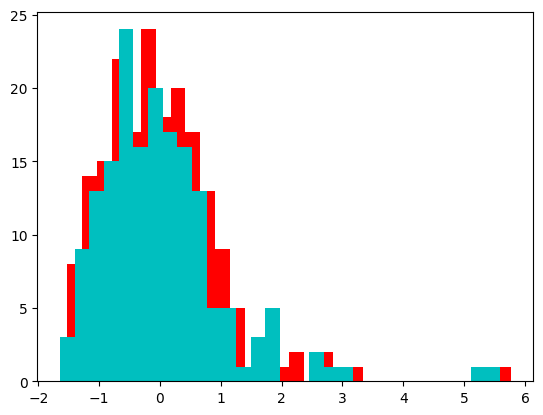

In [19]:
from matplotlib import pyplot as plt

features=char_csv[char_csv['region_index']==50]
phen_csv['subject_id']=phen_csv['SUB_ID']
#remover columna de handedness antes de merge
phen_csv = phen_csv.drop(columns='HANDEDNESS_CATEGORY')
print('before dropna:', len(phen_csv))
phen_csv=phen_csv.query('DSM_IV_TR>=0 & DSM_IV_TR<=4 & GENERO==1').dropna()
print('after dropna:', len(phen_csv))
phen_csv=phen_csv[phen_csv!=-9999]
print('after 999', len(phen_csv))

for sub in (discard_q_csv['ID'].values.tolist()+discarded_quality_b["SUBJECT_ID"].values.tolist()):
    phen_csv = phen_csv.query('subject_id!=@sub')
print('after QA: ', len(phen_csv))

features_merge=features.merge(phen_csv, on='subject_id')

#print(len(np.unique(features_merge['subject_id'])))

#print(f'{sample}: ', len(phen_csv.query('EDAD>=19')))
#print(f'{sample} ASD: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==1')))
#print(f'{sample} control: ', len(phen_csv.query('EDAD>=19').query('DX_GROUP==2')))

#print(np.shape(features_merge))

num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}

print(num_class)

#features_balanced=balance_classes(features_merge, num_class)
features_balanced = features_merge
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
print(num_class_balanced)

#features_balanced.iloc[:,:-4].to_csv('children_region_50.csv')

display(features_balanced)

pd.concat([features_balanced.iloc[:, 0:7], features_balanced.iloc[:, -5:]], axis=1).to_csv(f'{sample}_group.csv')

feature_matrix_p=features_balanced.iloc[:,7:250].values.astype(float)

feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)



asd_index=np.where(features_balanced['DX_GROUP']==1)

control_index=np.where(features_balanced['DX_GROUP']==2)

subband=33

#0 alpha, 1 beta, 2 mu
feature=(subband-1)*3 + (1)

asd_row=feature_matrix_p[asd_index,feature].squeeze()

control_row=feature_matrix_p[control_index, feature].squeeze()

#w_value, p_value=scipy.stats.wilcoxon(asd_row, control_row)

print('datos de ASD: mean: '+str(np.mean(asd_row))+ '  '+'std: '+str(np.std(asd_row)))
print('datos de Control: mean: '+str(np.mean(control_row))+ '  '+'std: '+str(np.std(control_row)))

plt.hist(asd_row, bins=30, color='r')
plt.hist(control_row, bins=30, color='c')

#print(p_value)


In [20]:
#descartar el centro IP en todas sus presentaciones...
#discard_centers = ['IP_1']
#for center in discard_centers:
#    char_csv = char_csv[char_csv['site_id']!=center]

char_csv['site_id'].unique()

array(['BNI_1', 'ETH_1', 'GU_1', 'IP_1', 'IU_1', 'KUL_3', 'NYU_1',
       'OHSU_1', 'ONRC_2', 'SDSU_1', 'STANFORD', 'TCD_1', 'UCD_1',
       'UCLA_1', 'U_MIA_1', 'USM_1', 'Caltech', 'Leuven', 'MaxMun', 'NYU',
       'OHSU', 'Olin', 'Pitt', 'SDSU', 'Trinity', 'UCLA', 'UM', 'USM',
       'Yale'], dtype=object)

phen_csv = phen_csv.dropna()

#char_DSM = char_csv.merge(phen_csv.dropna(), on='subject_id')

sub_ids = pd.unique(char_csv['subject_id'])

phen_csv_merged = phen_csv[phen_csv['subject_id'].isin(sub_ids)]

num_class={'ASD':(phen_csv_merged['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(phen_csv_merged['DX_GROUP']==1).value_counts()[0]}

phen_csv_balanced = balance_classes(phen_csv_merged, num_class)

char_DSM = char_csv.merge(phen_csv_balanced.dropna(), on='subject_id') 

char_DSM.iloc[:,0:250].to_csv('adults_curvelet_sample.csv', index=False)

print(np.unique(char_DSM['subject_id']).shape)

display(char_DSM.iloc[7600:7610, :250])
#display(phen_csv_balanced[['subject_id','DX_GROUP', 'DSM_IV_TR']].values)


In [21]:
def get_quartiles(features):
    return np.array([np.percentile(features, 25), np.percentile(features, 75)] )

In [22]:
def compare_quartiles(quartiles):
    return [np.where(quartiles[:,0]==np.min(quartiles[:,0]))[0].squeeze()+1, np.where(quartiles[:,1]==np.max(quartiles[:,1]))[0].squeeze()+1]
    

# Probando false discovery rate

In [23]:
def run_statistical_test(data_A, data_B):
    _, p_shap_c1 = normaltest(data_A)
    _, p_shap_c2 = normaltest(data_B)
    
    if (p_shap_c1>0.05 and p_shap_c2>0.05):
        t_value, p_value=scipy.stats.ttest_ind(data_A, data_B, equal_var=False)
        test='t-test'         
    else:
        w_value, p_value=scipy.stats.mannwhitneyu(data_A, data_B)
        test='wilcoxon'
    
    return p_value, test
    

idx = region_idx[-4]
region_name = region_list[-4]

features=char_csv[char_csv['region_index']==idx]
phen_csv['subject_id']=phen_csv['SUB_ID']
phen_csv=phen_csv.dropna()
phen_csv=phen_csv[phen_csv!=-9999]
features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
features_balanced=balance_classes(features_merge, num_class)
num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}

feature_matrix_p=features_balanced.iloc[:,7:250].values
    
feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
dx_group=features_balanced['DX_GROUP'].values
    
subject_idx = features_balanced['subject_id'].values
    
sub_bands_region=[]

asd_idx = np.where(dx_group==1)[0].tolist()
ctrl_index = np.where(dx_group==2)[0].tolist()
class_k = len(features_balanced)

print(ctrl_index)
num_samples = 100

p_vals = []

for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
    feature_vector = feature_matrix_p[:,k]
    asd_features = feature_vector[asd_idx]
    ctrl_features = feature_vector[ctrl_index]
    
    for j in range(num_samples):
        asd_sample = np.random.choice(asd_features, size=class_k * 70 // 100, replace=True)
        ctrl_sample = np.random.choice(ctrl_features, size=class_k * 70 // 100, replace=True)
        p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
        p_vals.append(p_value)

print(len(p_vals))

p_vals_sort = np.sort(p_vals)
rank = [i+1 for i in range(len(p_vals))]
num_tests = len(p_vals)

q_vals = [p_vals_sort[-1]]

for j, r in enumerate(rank[::-1]):
    
    if r == num_tests:
        continue
        
    i = r-1
    p_val = p_vals_sort[i]
    
    pr = p_val * (num_tests/r)
    
    if pr < q_vals[j-1]:
        q_vals.append(pr)
    else:
        q_vals.append(q_vals[j-1])
    

In [24]:
def generate_q_values(p_vals):
    p_vals_sort = np.sort(p_vals)
    rank = [i+1 for i in range(len(p_vals))]
    num_tests = len(p_vals)

    q_vals = [p_vals_sort[-1]]

    for j, r in enumerate(rank[::-1]):

        if r == num_tests:
            continue

        i = r-1
        p_val = p_vals_sort[i]

        pr = p_val * (num_tests/r)

        if pr < q_vals[j-1]:
            q_vals.append(pr)
        else:
            q_vals.append(q_vals[j-1])
    
    return q_vals

In [25]:
def false_discovery_rate(feature_matrix_p, dx_group, k_partition, num_samples):
    p_vals=[]
    asd_idx = np.where(dx_group==1)[0].tolist()
    ctrl_index = np.where(dx_group==2)[0].tolist()
    class_k = len(features_balanced)
    
    for k in tqdm.tqdm(range(len(feature_matrix_p.T))):
        feature_vector = feature_matrix_p[:,k]
        asd_features = feature_vector[asd_idx]
        ctrl_features = feature_vector[ctrl_index]

        for j in range(num_samples):
            asd_sample = np.random.choice(asd_features, size=class_k * k_partition // 100, replace=True)
            ctrl_sample = np.random.choice(ctrl_features, size=class_k * k_partition // 100, replace=True)
            p_value, _ = run_statistical_test(asd_sample, ctrl_sample)
            p_vals.append(p_value)
    
    q_vals = generate_q_values(p_vals)
    
    return q_vals, np.sort(p_vals)[::-1]
    

In [26]:
def map_p_q(p_vals_asc, q_vals, p_val):
    #p_vals asc, p_values en orden ascendente
    #q vals, q values en orden ascendente
    dif = np.abs(p_vals_asc - p_val)
    dif_idx = np.where(dif == dif.min())[0][0]
    return q_vals[dif_idx]

q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)

map_p_q(p_vals_asc, q_vals, )

plt.plot(p_vals_asc, q_vals)

In [27]:

#phen_csv=phen_csv.drop(columns='HANDEDNESS_CATEGORY')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import normaltest
import sklearn
from matplotlib.colors import Normalize

regions_subbands=[]

for i, idx in enumerate(region_idx):
    region_name=region_list[i]
    print(region_name)
    features=char_csv[char_csv['region_index']==idx]
    phen_csv['subject_id']=phen_csv['SUB_ID']
    phen_csv=phen_csv.dropna()
    phen_csv=phen_csv[phen_csv!=-9999]
    features_merge=features.merge(phen_csv.dropna(), on='subject_id')
    
    
    #TODO hacer funcion que balancee las clases
    num_class={'ASD':(features_merge['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_merge['DX_GROUP']==1).value_counts()[0]}
    
    print(num_class)
    #np.random.seed(94)
    #ctrl_index=(np.random.permutation(num_class['CONTROL'])[0:num_class['ASD']])
    #ctrl_dataframe=features_merge[features_merge['DX_GROUP']==2].iloc[ctrl_index,:]
    #asd_dataframe=features_merge[features_merge['DX_GROUP']==1]
    
    #features_balanced=pd.concat([ctrl_dataframe, asd_dataframe])
    
    #no vamos a balancear clases...
    features_balanced = features_merge
    #features_balanced=balance_classes(features_merge, num_class)
    
    num_class_balanced={'ASD':(features_balanced['DX_GROUP']==1).value_counts()[1], 
               'CONTROL':(features_balanced['DX_GROUP']==1).value_counts()[0]}
    
    print('balanced')
    print(num_class_balanced)

    feature_matrix_p=features_balanced.iloc[:,7:250].values
    
    feature_matrix_p=sklearn.preprocessing.scale(feature_matrix_p, axis=0, with_mean=True, with_std=True)
    
    dx_group=features_balanced['DX_GROUP'].values
    
    subject_idx = features_balanced['subject_id'].values
    
    sub_bands_region=[]
    
    q_vals, p_vals_asc = false_discovery_rate(feature_matrix_p, dx_group, 70, 100)
    
    for k, feature_group in enumerate(np.arange(243).reshape(81,3)):
        
        significative_features={}
        feature_labels=['alpha', 'beta', 'mu']
        sig_features_list=[]
        sig_features_labels=[]
        for j, feat in enumerate(feature_group):
                #dsm=features_balanced['DSM_IV_TR'].values
                feature_matrix=feature_matrix_p[:, feat].reshape(-1,1)
                feature_vector=feature_matrix.reshape(-1)
                # 1 probamos con shappiro...
                _, p_shap_c1 = normaltest(feature_vector[np.where(dx_group==1)])
                _, p_shap_c2 = normaltest(feature_vector[np.where(dx_group==2)])
                
                if (p_shap_c1>0.05 and p_shap_c2>0.05):
                    
                    t_value, p_value=scipy.stats.ttest_ind(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)], equal_var=False)
                    test='t-test'
                    
                else:
                    w_value, p_value=scipy.stats.mannwhitneyu(feature_vector[np.where(dx_group==1)], 
                                                   feature_vector[np.where(dx_group==2)])
                    
                    test='wilcoxon'
                    
                
                print('caracteristica numero: ' + str(feat+1))
                print('sub-banda: ' + str(k+1))
                print(test+': '+str(p_value))
            
                q_value = map_p_q(p_vals_asc, q_vals, p_value)
                
                if q_value<0.05:
                    #significative_features[feature_labels[j]]=p_value
                    #sig_features_list.append(feat)
                    #sig_features_labels.append(feature_labels[j])
                    
                    fig, axs = plt.subplots(2,2,figsize=(10,10), dpi=200)
                    
                    sub_bands_region.append(k+1)
                    
                    #asd=(np.std(feature_vector[np.where(dx_group==1)])/np.shape(feature_vector[np.where(dx_group==1)])[0])**-1*feature_vector[np.where(dx_group==1)]
                    #control=(np.std(feature_vector[np.where(dx_group==2)])/np.shape(feature_vector[np.where(dx_group==2)])[0])**-1*feature_vector[np.where(dx_group==2)]
                    
                    asd=feature_vector[np.where(dx_group==1)]
                    
                    control=feature_vector[np.where(dx_group==2)]
                    
                    print('quartiles')
                    quartiles = np.array([get_quartiles(asd), get_quartiles(control)])
                    comparison = compare_quartiles(quartiles)
                    quartile_idx = np.array(comparison)-1
                    comp_values = [row[comp] for row,comp in zip(quartiles.T, quartile_idx)]
                    
                    print(comparison)
                    print(comp_values)
                    
                    val_idx=0
                    comp_dict = {}
                    for comp,val in zip(comparison, comp_values):
                        features = feature_vector[np.where(dx_group==comp)]
                        subs_idx_df = subject_idx[np.where(dx_group==comp)]
                        sub_idx = (np.where(np.abs(features)>=abs(val))[0]).squeeze()
                        subs = subs_idx_df[sub_idx]
                        comp_dict[comp]=subs
                    
                    feature_concat=[*asd.reshape(-1).tolist(), *control.reshape(-1).tolist()]
                    #print(concat)
                    
                    asd_dx=1*np.ones(np.shape(feature_vector[np.where(dx_group==1)]))
                    ctrl_dx=2*np.ones(np.shape(feature_vector[np.where(dx_group==2)]))
                    
                    concat_dx=[*asd_dx.tolist(), *ctrl_dx.tolist()]
                    #print(concat_dx)
                    
                    scatter_dataframe_dx_group=pd.DataFrame(data={feature_labels[j]:feature_concat,
                                                'dx_group':concat_dx})
                    
                    
                    sns.boxplot(x='dx_group', y=feature_labels[j], data=scatter_dataframe_dx_group, palette=colors[i], ax=axs[0][0])
                    sns.distplot(scatter_dataframe_dx_group[feature_labels[j]], ax=axs[0][1], color='0.23', kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==1][feature_labels[j]], color=colors[i][0], ax=axs[1][0], kde=False)
                    sns.distplot(scatter_dataframe_dx_group[scatter_dataframe_dx_group['dx_group']==2][feature_labels[j]], color=colors[i][1], ax=axs[1][1], kde=False)
                    axs[1][0].set_title('Distribution '+feature_labels[j]+' '+'ASD')
                    axs[0][1].set_title('Comparison '+feature_labels[j]+' '+'ASD vs Controls')
                    axs[1][1].set_title('Distribution '+feature_labels[j]+' '+'Controls')
                    axs[0][0].set_title('Differences distribution ASD vs Controls')
                
                    #axs[0][1].hist(feature_concat)
                    #axs[1][0].hist(asd)
                    #axs[1][1].hist(control)
                    
                    fig.suptitle('Region: '+region_name+' Sub-band: '+str(k+1)+'\n Feature: '+feature_labels[j]+', Test: '+test+' P-value: '+str(np.round(p_value, decimals=4))+' Q-value: '+str(np.round(q_value, decimals=4)), fontsize=16)
                    
                    if not os.path.exists(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig'):
                        os.makedirs(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig')
                    fig.savefig(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig/'+'feature'+str(feat+1)+'-subband'+str(k+1)+'.pdf')
                    plt.close(fig)
                    pd.DataFrame.from_dict(comp_dict, orient='index').transpose().to_csv(os.getcwd()+f'/results_{sample}/'+region_name+'/1-sig/'+'subjects-feature'+str(feat+1)+'-subband'+str(k+1)+'.csv',index=False)
        feature_matrix_list=np.array(sig_features_list)
    regions_subbands.append(np.unique(sub_bands_region))

    fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))

    curv_bands=np.zeros(81)
    
    if not os.path.exists(os.getcwd()+f'/results_{sample}/'+region_name):
        os.makedirs(os.getcwd()+f'/results_{sample}/'+region_name)
        
    if not np.unique(sub_bands_region).size == 0:
        curv_bands[[subband-1 for subband in np.unique(sub_bands_region)]]=1
    
    fig.suptitle('Discriminant Subbands \n Region: '+region_name, fontsize=14)
    
    bulls_eye(axs, curv_bands, cmap='RdBu', norm=Normalize(vmin=-1.6, vmax=1.6), raidal_subdivisions=(1,16,32,32),
    centered=(True, True, True, True), add_nomenclatures=False, cell_resolution=16,
              pfi_where_to_save=os.getcwd()+f'/results_{sample}/'+region_name+'/sub-bands-plot.pdf', colors_bound='0.20')
    
    plt.tight_layout()
    plt.close(fig)
    

Left Frontal Pole
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.79it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.17681156506120044
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.1255026541578289
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.38408300092985115
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4340787115368551
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.30888819351710917
caracteristica numero: 6
sub-banda: 2
t-test: 0.7121942402632385
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.33741596843894806
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.41163364109544287
caracteristica numero: 9
sub-banda: 3
t-test: 0.9529245765534069
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.43883375959925797
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4715277493286268
caracteristica numero: 12
sub-banda: 4
t-test: 0.9529245765534049
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.40304320929712034
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3199579142078561
caracteristica numero: 15
sub-banda: 5
t-test: 0.1643118

caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.19931185055241335
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.3007851881557433
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.34776699664738625
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.16681682662578112
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.27037387681529773
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.3206777668299061
caracteristica numero: 129
sub-banda: 43
t-test: 0.7412236032629133
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.29798940161114773
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.38101232150527675
caracteristica numero: 132
sub-banda: 44
t-test: 0.6763494278227571
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.3181612507124544
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.3979886711026145
caracteristica numero: 135
sub-banda: 45
t-test: 0.19112708046002203
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.27808383148654015
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Pole
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2790973293740378
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.36728934775304684
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.15098583474773675
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.41006846076064835
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.29381808359739103
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4595324249469259
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.19153562549931785
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.27371286910749293
caracteristica numero: 9
sub-banda: 3
t-test: 0.9419471733515539
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.30288976186735783
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3760384898974603
caracteristica numero: 12
sub-banda: 4
t-test: 0.941947173351558
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2784214645578844
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.34628109069834134
caracteristica numero: 15
sub-banda: 5
t-test: 0.14445

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.399153617846837
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.39024605846798965
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.4230217799790893
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.35335983510446145
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.3883170572348335
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.02777646442441249
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.3319203687953328
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.34442703268016067
caracteristica numero: 225
sub-banda: 75
t-test: 0.5090058315502048
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.31030710983029847
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3250109772334646
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.11021653234279555
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.34109915582392647
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.33999258906816854
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Insular Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.59it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3117288553134774
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2523810310481136
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4026538112443946
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.33046090127714006
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.31744377848630123
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.46112991030614037
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.23752070870229453
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15889381774413275
caracteristica numero: 9
sub-banda: 3
t-test: 0.8527999687713387
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.46952643709982855
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.39179120995306127
caracteristica numero: 12
sub-banda: 4
t-test: 0.8527999687713391
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.42341568197875257
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.49959864140821775
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.3879315856698208
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.26639414398576355
caracteristica numero: 135
sub-banda: 45
t-test: 0.888352903757468
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.24885972658721034
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.17655065332237696
caracteristica numero: 138
sub-banda: 46
t-test: 0.8883529037574716
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.34888296416523173
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.28045144740657363
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.1122185465042907
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.32211949478400587
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.29381808359739103
caracteristica numero: 144
sub-banda: 48
t-test: 0.3078131436568103
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.44081767885695927
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.38408300092985115
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Insular Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.20727517756329444
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2154236401931346
caracteristica numero: 3
sub-banda: 1
t-test: 0.789951311008112
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.24536474712837247
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3235639044007472
caracteristica numero: 6
sub-banda: 2
t-test: 0.10747862992719326
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.14040688736647838
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.18048988948949862
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.13552966303879704
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.11366440634007846
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.15938166001037346
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.13552966303879704
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2707068577244971
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2510975255605846
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.45

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.001735635862909128
quartiles
[2, 1]
[-1.323494263102392, 0.8024519897850045]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.3330166470938604
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.07845772958581217
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.017485441213989834
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.3330166470938604
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.33155526165093174
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.24758576693055373
caracteristica numero: 117
sub-banda: 39
t-test: 0.15209569530589573
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.07598249993888968
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.070122470060076
caracteristica numero: 120
sub-banda: 40
t-test: 0.3840175727028856
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.13531076358057637
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.21808173672868025
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.355231245885495
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.11937982499399419
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.02614823425570664
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.09961845177540696
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.06971758365958573
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.005773245351563501
quartiles
[2, 1]
[-0.28226077763621826, 0.018012909873276008]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.11818099175898877
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.10536970113881972
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.45554161253264674
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.04937546681192867
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.031714302095077994
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.4635273191090223
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.18421584590982693
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.13400245708450026
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.3768023791162258


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Frontal Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.67it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1415317647018009
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.09631405232667428
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.35223868461628643
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0694486607683069
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06448955981027829
caracteristica numero: 6
sub-banda: 2
t-test: 0.3647165880486064
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.23907842119668943
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.21454180209937135
caracteristica numero: 9
sub-banda: 3
t-test: 0.46672019242621776
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.025784142723814855
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0207613987477158
caracteristica numero: 12
sub-banda: 4
t-test: 0.46672019242621765
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.07526592653643949
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05630709201315668
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.07990116684296776
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.33594701987763953
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.3242871090727346
caracteristica numero: 60
sub-banda: 20
t-test: 0.053939814063985174
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.14288965741238197
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.10758719324437582
caracteristica numero: 63
sub-banda: 21
t-test: 0.6966239898670408
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.0892967685044917
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.09700293348480465
caracteristica numero: 66
sub-banda: 22
t-test: 0.6966239898670405
caracteristica numero: 67
sub-banda: 23
t-test: 0.2134984760059089
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.1350921065952907
caracteristica numero: 69
sub-banda: 23
t-test: 0.19324197474865526
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.2469500959743724
caracteristica numero: 71
sub-banda: 2

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.06680319492483053
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.051041027424768286
caracteristica numero: 144
sub-banda: 48
t-test: 0.42302495600134227
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.16208230281750935
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.1357488050170309
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.4975918626674661
caracteristica numero: 148
sub-banda: 50
t-test: 0.23950926132099953
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.1255026541578289
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.10210575419941487
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.40148619786436324
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.47713508888580475
caracteristica numero: 153
sub-banda: 51
t-test: 0.8472613019803856
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.2700411007553576
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.20987424008073824
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.003453835114209455
quartiles
[2, 1]
[-0.21568576878843243, 0.6306174980957755]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.09614239520079826
caracteristica numero: 175
sub-banda: 59
t-test: 0.04930218849072055
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.046369688921969444
caracteristica numero: 177
sub-banda: 59
t-test: 0.6601088975757604
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.013094895136520802
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.015503372538310653
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.21307674481565847
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.09443818003706056
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.11040609068849316
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.3447975470923421
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.05745631538159743
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.060049521713219874
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.3447975470923421
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.042683746979267904
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.005798147461756944
quartiles
[2, 1]
[-0.18412685724232494, 0.6458550456048294]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.013231064812834072
caracteristica numero: 223
sub-banda: 75
t-test: 0.010918810098002156
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.019488534807142747
caracteristica numero: 225
sub-banda: 75
t-test: 0.5150056295739341
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.05562630409563563
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.0683809521688212
caracteristica numero: 228
sub-banda: 76
t-test: 0.8076579350792862
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.1435718949401199
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.161589072876356
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.2929523878025494
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.050306923096824364
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.05862391104842129
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.44936479592539963
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0454010470939765
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Frontal Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.53it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3867758347964516
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.48595534926867023
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.33999258906816854
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3206777668299061
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4372477274323948
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.22586601476189205
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.19707090245512615
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.20270190137835303
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.26705536899987825
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.49678916538918
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.48595534926867023
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.26705536899987825
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.42617511801406793
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4139840429327629
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0

caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.19181010671540139
caracteristica numero: 225
sub-banda: 75
t-test: 0.20211346479525585
caracteristica numero: 226
sub-banda: 76
t-test: 0.8074451908240561
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.42380966053397284
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.06563847414769836
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.21986425498251339
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.29001827563691174
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.37909679052231926
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.24378488455136416
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.39179120995306127
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.4153564088519228
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.1388422826286308
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.20156807440080715
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.18234692145897502
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Frontal Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.50it/s]


caracteristica numero: 1
sub-banda: 1
t-test: 0.5540360034454213
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3836987633971511
caracteristica numero: 3
sub-banda: 1
t-test: 0.826091740090498
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4715277493286268
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4171226970345784
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.17061696319499986
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.10796002077440436
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.05351326435152923
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.21454180209937135
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.18502044988991612
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.127591472219727
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.21454180209937135
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.34516821041593404
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2993858149230476
caracteristica numero: 15
sub-banda: 5
t-test: 0.2883359

quartiles
[2, 1]
[-0.018077552131770536, 0.026785381221375006]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.07569524973473887
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.07245107321576191
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.1240547560366384
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.1852891356845659
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.18234692145897502
caracteristica numero: 228
sub-banda: 76
t-test: 0.18640149591294347
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.2122005190064733
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.21366206613439143
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.015859367428079783
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.14910888758318663
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.14334423855459216
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.0370287759515177
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.03392562876227653
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.032219326815808566
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Frontal Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.54it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.49117083037073633
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.48274695922438227
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3756567271380136
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.19540024069278955
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2067002035490763
caracteristica numero: 6
sub-banda: 2
t-test: 0.9627928717253125
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1419834207495964
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11483060687522939
caracteristica numero: 9
sub-banda: 3
t-test: 0.22771427579995576
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.07934578369678424
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.059690599008026625
caracteristica numero: 12
sub-banda: 4
t-test: 0.22771427579995618
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.12119412205074231
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.08452234741848791
caracteristica numero: 15
sub-banda: 5
t-test: 0.717

caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.3396240390161892
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.1606055515370558
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.16556233303089135
caracteristica numero: 240
sub-banda: 80
t-test: 0.3057217162892026
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.35373383546445203
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.3110176300119972
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.2882987392800478


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Frontal Gyrus (pars triangularis)
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.73it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2784214645578844
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3071185529934788
caracteristica numero: 3
sub-banda: 1
t-test: 0.04107209764933341
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10192660501872197
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.017098126775594993
caracteristica numero: 6
sub-banda: 2
t-test: 0.7242768443694866
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1415317647018009
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11561278767159067
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4135920928421811
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3567308950081379
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3145807639483708
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4135920928421811
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4245978457749991
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.45195370132233864
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.4727

caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.42933318320973457
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.42380966053397284
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.17720288724354127
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4042119790495039
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.36956530913060914
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.11308446801351418
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.3760384898974603
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3756567271380136
caracteristica numero: 240
sub-banda: 80
t-test: 0.7961419182942799
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.2133692884694578
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.20156807440080715
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.3188794058817667


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Frontal Gyrus, pars triangularis
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.78it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.08483456131358835
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.06998730743640057
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.45993173728441256
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.17943407399278227
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.36842675138658054
caracteristica numero: 6
sub-banda: 2
t-test: 0.04682794014493933
caracteristica numero: 7
sub-banda: 3
t-test: 0.36109676302055616
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.161589072876356
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2581993283796659
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1169906969754601
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.12261858678854914
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2581993283796659
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1874473346384945
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.35373383546445203
caracteristica numero: 15
sub-banda: 5
t-test: 0.2837

caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.34628109069834134
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.49036832805683406
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.41987336598126324
caracteristica numero: 240
sub-banda: 80
t-test: 0.6086416136611956
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.3160108918659078
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.4022645097414114
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4380406191048533


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Frontal Gyrus, pars opercularis
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.63it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.355231245885495
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3798627341552494
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1747310948817835
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3135099891238603
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.26048063385349274
caracteristica numero: 6
sub-banda: 2
t-test: 0.951870038344019
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.37871420747745377
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2707068577244971
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.46792593900574503
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.30747212367663723
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4643267525224257
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.46792593900574503
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3422070909589412
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.22405582442288907
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2999

caracteristica numero: 144
sub-banda: 48
t-test: 0.8088410030339019
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.06065147912314469
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.059096132490490574
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.18088679258429102
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.112891644823165
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.08236094432281149
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.44797174324722394
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.11173954634258071
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.1098381161853107
caracteristica numero: 153
sub-banda: 51
t-test: 0.050526061389757744
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.08609206699926958
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.08328210824652882
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.14448495996031102
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.44359765211592583
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Frontal Gyrus, pars opercularis
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.71it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.18368065495096986
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.15478671020815254
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.42499205169219245
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.19790946522850772
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.19016683214991775
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.24362692546315645
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3779491169676197
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.48595534926867023
caracteristica numero: 9
sub-banda: 3
t-test: 0.4310135618618065
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3396240390161892
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.28248856827459007
caracteristica numero: 12
sub-banda: 4
t-test: 0.4310135618618057
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.15430817373725664
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.054063062844765204
caracteristica numero: 15
sub-banda: 5
t-test: 0.3

caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.153354038688566
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.15370940711287157
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.16456314292415825
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.1579210721365441
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.3995421336564189
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.2225536485279111
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.2090057647512376
caracteristica numero: 240
sub-banda: 80
t-test: 0.6538863057998019
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.38870263883932976
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.40148619786436324
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.04473273157015802


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Precentral Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.75it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3260980184287726
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3817792976430775
caracteristica numero: 3
sub-banda: 1
t-test: 0.6161931278098216
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.04968441020673588
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.04896593012561676
caracteristica numero: 6
sub-banda: 2
t-test: 0.10833450970887934
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.128644895654693
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.15454731955301454
caracteristica numero: 9
sub-banda: 3
t-test: 0.025661883328346104
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2972923100260121
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.30324116411317437
caracteristica numero: 12
sub-banda: 4
t-test: 0.025661883328346246
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.15216687758686315
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.12038538758163769
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.3867

caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.012399703924779518
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.10482053095816768
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.054063062844765204
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.06971758365958573
caracteristica numero: 135
sub-banda: 45
t-test: 0.5583855825265926
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.031857922960110086
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.031145158449472007
caracteristica numero: 138
sub-banda: 46
t-test: 0.558385582526592
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.021218101657068764
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.020313047185246777
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.4639270176099176
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.04053572890247611
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.03207436123806449
caracteristica numero: 144
sub-banda: 48
t-test: 0.16291874678951498
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Precentral Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.69it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2479039298855203
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24410041715931313
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.23042748357208426
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2945114246657256
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.26838030054609596
caracteristica numero: 6
sub-banda: 2
t-test: 0.8573737017920584
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07612643592307289
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.07612643592307289
caracteristica numero: 9
sub-banda: 3
t-test: 0.21312894896324042
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.28248856827459007
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2747185294804265
caracteristica numero: 12
sub-banda: 4
t-test: 0.21312894896323833
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.34368645184976554
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3571061546301784
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.339

caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.31030710983029847
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.29208804314359427
caracteristica numero: 225
sub-banda: 75
t-test: 0.21437908360005056
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.2252617008441447
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.165312168397925
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.24032860078729268
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.2660638423868829
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.22315382870015393
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.13130471722620707
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.21808173672868025
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.1606055515370558
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.17048937430221417
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.14678470889823336
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.11718848723861047
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Temporal Pole
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.77it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.008719650795289873
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.004932351904364269
caracteristica numero: 3
sub-banda: 1
t-test: 0.5222273149320402
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.05653547527098492
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11620190195781577
caracteristica numero: 6
sub-banda: 2
t-test: 0.7491212113704211
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.03570556717937539
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.05178363245857215
caracteristica numero: 9
sub-banda: 3
t-test: 0.3673281743546448
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.13465551985302066
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3370484978385861
caracteristica numero: 12
sub-banda: 4
t-test: 0.36732817435464493
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3203177560013739
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.48074226945724535
caracteristica numero: 15
sub-banda: 5
t-test: 0.43964

caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.39082510014080585
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.40499163483702616
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.39566151369660013
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.15816389117316415
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.2654038620256392
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.24064170126031015
caracteristica numero: 240
sub-banda: 80
t-test: 0.5189025596167716
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.03243778882629259
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.03016949732869427
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.4603310900403641


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Temporal Pole
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.68it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.11738651427210411
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.09359447240465685
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.29381808359739103
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07121100991264674
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.03072386785064973
caracteristica numero: 6
sub-banda: 2
t-test: 0.8966843792934109
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4491657989125055
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.14448495996031102
caracteristica numero: 9
sub-banda: 3
t-test: 0.3418993593850872
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.48435102759911314
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3050009023708969
caracteristica numero: 12
sub-banda: 4
t-test: 0.3418993593850872
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.48114317007708085
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2821485545215043
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.3282

caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.21897195259154562
caracteristica numero: 225
sub-banda: 75
t-test: 0.3464185081467228
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.2122005190064733
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.15816389117316415
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.21307674481565847
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.14817628303958658
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.09242265117309684
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4396270472735785
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.165312168397925
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.1419834207495964
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3813954530490924
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.12323265324689436
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.09242265117309684
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.4151604058872572
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Temporal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.76it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.020811728962392674
quartiles
[2, 1]
[-0.705977186617923, 0.49035143078282584]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.012993564337712392
quartiles
[2, 1]
[-0.7177868473317095, 0.5179062244424322]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.18880406593236437
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.0046933549038228415
quartiles
[2, 1]
[-0.8484073326725622, 0.6847233405966129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0044779104984731645
quartiles
[2, 1]
[-0.8486302979929021, 0.7579688303567216]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 6
sub-banda: 2
t-test: 0.9866011808713532
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2113264031814142
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.17240922299023959
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.13552966303879704
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.04578653276051912
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.05619317343819261
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.13552966303879704
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.06798384280444005
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.009408339039269608
quartiles
[2, 1]
[-0.8246297566754892, 0.6586733825536607]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
t-test: 0.031168297209601264
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.2520598308028834
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.15840695511954944
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.16820326806311864
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.39217776572078616
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.4042119790495039
caracteristica numero: 21
sub-banda: 7
t-test: 0.9258562514443625
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.2261685151864179
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.25045707010009033
caracteristica numero: 24
sub-banda: 8
t-test: 0.9258562514443623
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.3135099891238603
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.07512323208371102
caracteristica numero: 27
sub-banda: 9
t-test: 0.8441684499245791
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.02006752862806058
quartiles
[2, 1]
[-0.8926627063791688, 0.668678

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.01214340411250639
quartiles
[2, 1]
[-0.7925145327162809, 0.651211505187018]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.35635526181134686
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.10427343625253754
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.07583877126054825
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.21249235997618632
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.3752750860756002
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.35074581410765193
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.21249235997618632
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.05362286819259101
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.008232541297769276
quartiles
[2, 1]
[-0.7912830861298747, 0.6832086948421664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.24679067259382004
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.19181010671540139
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.08328210824652882
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.06304367658835044
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.28350979005922383
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.24410041715931313
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.2139550777010772
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.4194801702217538
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.23042748357208426
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.2139550777010772
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.3060589174847993
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.06811601426523096
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.0605903776325136
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.04835671855582083
caracteristica numero: 53

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.1139549706999694
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.0168861376258585
quartiles
[2, 1]
[-0.7308873286466508, 0.7640142822474212]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.0006491299952050449
quartiles
[2, 1]
[-0.8470181298903838, 0.8350420733682284]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.9008633205347516
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.0016109425927114856
quartiles
[2, 1]
[-0.9273624622724814, 0.7710422018292751]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.00013268241606629477
quartiles
[2, 1]
[-0.905459527117856, 0.7962642899247077]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.42735881275970916
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.02142379208963767
quartiles
[2, 1]
[-0.9091585830057312, 0.6988397867274845]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.0032405788766977687
quartiles
[2, 1]
[-0.8661521333120832, 0.6361128246824419]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
wilcoxon: 0.3018366506460068
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.03923836615515913
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.026889573773200705
caracteristica numero: 66
sub-banda: 22
wilcoxon: 0.3018366506460068
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.019110473383238298
quartiles
[2, 1]
[-0.8585908282771275, 0.6256811634683004]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.017226408835998068
quartiles
[2, 1]
[-0.8482397132613022, 0.7494099271484638]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.19553911805576168
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.045113649301303335
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.017013059724099333
quartiles
[2, 1]
[-0.843321061385029, 0.7645116630504976]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 72
sub-banda: 24
t-test: 0.5166855374901943
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.09393128507782794
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.007578172678392151
quartiles
[2, 1]
[-0.8577073981690164, 0.6981319547149241]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.0871239355571648
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.25690039109724017
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.05815465696991632
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.13313493071366406
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.15193017961134708
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.05573931541095928
caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.4108508734979058
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.039153090807550195
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.009157102788504016
quartiles
[2, 1]
[-0.8562092634379085, 0.7250736811524752]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.278083556763757
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.34665234650861043
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.10573696904380003
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.4018753051581655
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.08672602547969172
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.026209427964379296
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.4018753051581655
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.2952055198398491
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.09786911243184887
caracteristica numero: 93
sub-banda: 31
t-test: 0.43748486539816644
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.06150213660088136
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.005458817382262357
quartiles
[2, 1]
[-0.804444923876042, 0.7007018732409727]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.4095367075289539
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.0831280453604174
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.01011702046663682
quartiles
[2, 1]
[-0.8624075919525214, 0.8049618723851342]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.11260269635164827
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.026332009814416392
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.0007699233273874599
quartiles
[2, 1]
[-0.8765095945923368, 0.6948186089361221]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.07706701833388961
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.014549691119217167
quartiles
[2, 1]
[-0.848013701908543, 0.6823625490000842]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.002424031934067321
quartiles
[2, 1]
[-0.9251940882839458, 0.7514501128741639]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.20842795895211425
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.0017581975065571096
quartiles
[2, 1]
[-0.8455653380579817, 0.6951009917254978]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.00029008984190524376
quartiles
[2, 1]
[-0.845424471463008, 0.8244304902084638]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.35392082692736637
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.03461323647963482
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.004183679187796276
quartiles
[2, 1]
[-0.794930547253395, 0.6393358022646529]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.6945445408972788
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.00041872738679196914
quartiles
[2, 1]
[-0.8457205978496091, 0.7272622478317801]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.00010640829490325809
quartiles
[2, 1]
[-0.847708923933956, 0.7430779276632526]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.6945445408972781
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.0328783795831693
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.030032207843938806
caracteristica numero: 117
sub-banda: 39
t-test: 0.297758390906072
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.01017132157080486
quartiles
[2, 1]
[-0.901948064101189, 0.777443825302654]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.0027201604248132086
quartiles
[2, 1]
[-0.7848300321194425, 0.7129761704055055]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 120
sub-banda: 40
t-test: 0.04713278001456196
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.17036193809896916
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.021320737122594212
quartiles
[2, 1]
[-0.8023362328588635, 0.6869682163180096]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.2934716491696534
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.45354786182099593
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.2035547673986215
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.20015595295407168
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.08656720974685483
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.01017132157080486
quartiles
[2, 1]
[-0.8066734682259993, 0.6249797995158547]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.11541868984865027
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.051677023253440243
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.012562259542514173
quartiles
[2, 1]
[-0.8700617702254785, 0.6177080688952781]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.4997993204375866
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.2168980334989422
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.0720358937444272
caracteristica numero: 135
sub-banda: 45
t-test: 0.12026387198148898
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.14243605156403205
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.041867698951230436
caracteristica numero: 138
sub-banda: 46
t-test: 0.12026387198148897
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.20128521247553144
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.07107423715648613
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.17550901658045437
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.44081767885695927
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.348138839869563
caracteristica numero: 144
sub-banda: 48
t-test: 0.9878785863911181
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.05768835916000926
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3699450198401489
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.005949215553540512
quartiles
[2, 1]
[-0.8068836440375315, 0.555651308996049]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.002840468390063976
quartiles
[2, 1]
[-0.858191875000714, 0.811194332686204]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.46592604826072753
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.004347785329025725
quartiles
[2, 1]
[-0.7255607737972702, 0.46990071153610846]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.002371405198300493
quartiles
[2, 1]
[-0.9021876474431052, 0.7793499627657658]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.4171226970345784
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.17343872583996273
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.1698525599314767
caracteristica numero: 156
sub-banda: 52
t-test: 0.5509558985490768
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.2035547673986215
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.1802255709623618
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.13751067706757536
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.3120847317023927
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.2945114246657256
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.13751067706757536
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.009955631954723689
quartiles
[2, 2]
[-0.5117511036342697, 0.03666717922745993]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.008695894393573886
quartiles
[2, 1]
[-0.904216123572438, 0.49444540622927446]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
t-test: 0.7746259518029108
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.008672194766416943
quartiles
[2, 1]
[-0.7457170754850097, 0.3828091753479377]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0047765006276704065
quartiles
[2, 1]
[-0.922275573364292, 0.663192266769558]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.04578653276051912
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.008887544714285503
quartiles
[2, 1]
[-0.8027387417542604, 0.5565192417035747]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.003201328136569239
quartiles
[2, 1]
[-0.9192806968160496, 0.7754342172431952]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.24901920294744
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.003220899715533681
quartiles
[2, 1]
[-0.8130894756421738, 0.5392621231668817]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.0004871326291097918
quartiles
[2, 1]
[-0.900996661938984, 0.7051353687118646]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.44797174324722394
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.006989605206989566
quartiles
[2, 1]
[-0.7933259164682889, 0.5085218068753927]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.001494465147222996
quartiles
[2, 1]
[-0.8697966316116869, 0.683560100685415]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.26639414398576355
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.0065334173797428185
quartiles
[2, 1]
[-0.7918987124490405, 0.5665763689678607]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.002694986471434581
quartiles
[2, 1]
[-0.901486076262489, 0.7456744707387024]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.09979463445749787
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.0013902939827136263
quartiles
[2, 1]
[-0.7860641929414218, 0.5544213872929715]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.00041721299923826047
quartiles
[2, 1]
[-0.9410165740329639, 0.7301757698701508]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.30008513257348157
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.0044779104984731645
quartiles
[2, 1]
[-0.8254780613821899, 0.554538363110495]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.001998939950948263
quartiles
[2, 1]
[-0.917232508361483, 0.7185070742048176]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.30008513257348157
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.0026044716662241394
quartiles
[2, 1]
[-0.8253838662116508, 0.6277697554684893]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.0007411312697320448
quartiles
[2, 1]
[-0.9248381592093335, 0.8494055787861129]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.023020814743674678
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.004334960519784655
quartiles
[2, 1]
[-0.800547880572044, 0.6268871932727933]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.0019114705228886796
quartiles
[2, 1]
[-0.9269772554680514, 0.6918519370238629]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
t-test: 0.9786486124765255
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.0007360041780952564
quartiles
[2, 1]
[-0.8415869552053372, 0.5516849889181434]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.00015444962966382675
quartiles
[2, 1]
[-0.9703205121630432, 0.8047649312459736]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.22016215222415575
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.0032405788766977687
quartiles
[2, 1]
[-0.8412179623131963, 0.558002434429001]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.0013857204378293006
quartiles
[2, 1]
[-0.877296020704665, 0.7986635076942081]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.4226279549187176
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.004544268365500761
quartiles
[2, 1]
[-0.6685329795252549, 0.3895634116291451]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.004097628967334172
quartiles
[2, 1]
[-0.7988563475341894, 0.6463563916319398]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.006970050114532676
quartiles
[1, 2]
[-0.7699019451126605, 0.6594749577413828]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.35335983510446145
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3447975470923421
caracteristica numero: 204
sub-banda: 68
t-test: 0.35370345110537493
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.2713734332455952
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.23257366704099042
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.11173937066752582
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.47232847842568526
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.49237464983905793
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.11097596331899912
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0021917874978838966
quartiles
[2, 1]
[-0.48858872393625374, 0.051651828874318836]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0014847088800728967
quartiles
[2, 1]
[-0.9184244599052382, 0.5241658176543862]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 213
sub-banda: 71
t-test: 0.5319474289494033
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.008232541297769276
quartiles
[2, 1]
[-0.7325329507113889, 0.43341019808166503]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.00436064403649
quartiles
[2, 1]
[-0.9314495103015503, 0.7343161139439303]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.028163953276036893
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.003791713237245518
quartiles
[2, 1]
[-0.7857992733246183, 0.5956980089141541]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.001033105705509353
quartiles
[2, 1]
[-0.9173158551211036, 0.8328569704861868]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.17163965930622083
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.007494479020499913
quartiles
[2, 1]
[-0.8330650045322779, 0.5800536016462365]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0018992628496095594
quartiles
[2, 1]
[-0.8694848457902724, 0.7160645801695757]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4132002288287569
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0011777550880932872
quartiles
[2, 1]
[-0.8159632572486739, 0.6371881873762986]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0001901477915910443
quartiles
[2, 1]
[-0.9050330765313559, 0.7604986287642685]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.4727288851200172
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.00519717050740493
quartiles
[2, 1]
[-0.8323211060824822, 0.5162554417394223]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.00249324682731184
quartiles
[2, 1]
[-0.9305326770508325, 0.6776151661872631]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 228
sub-banda: 76
t-test: 0.8468562055192892
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.0028492427619760067
quartiles
[2, 1]
[-0.7617816250758828, 0.48315121589585086]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.0007133342527961564
quartiles
[2, 1]
[-0.901863852368749, 0.7347866630583502]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.43388060831112385
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.004491112420447014
quartiles
[2, 1]
[-0.8261630716273702, 0.5720506701307524]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.0015901093674208278
quartiles
[2, 1]
[-0.8771224061849688, 0.748172664565157]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.2544734504565612
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.0023491691622181256
quartiles
[2, 1]
[-0.8336061260571239, 0.6823147358506749]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.0005213589379237044
quartiles
[2, 1]
[-0.9743328878696552, 0.8157862681890786]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.3790969312655206
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.0009049226629204388
quartiles
[2, 1]
[-0.9028764140876224, 0.6523512372504634]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.0002498127575658136
quartiles
[2, 1]
[-0.8961990222464764, 0.7012461617546394]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.029488220270333394
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.0011275974720868806
quartiles
[2, 1]
[-0.8486874857375983, 0.5663205906538894]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.0002774129425865819
quartiles
[2, 1]
[-0.9926619264529258, 0.741434364002014]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.2790973293740378


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Temporal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.69it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.006297478987717955
quartiles
[1, 2]
[-0.6670918116896366, 0.3376696509062606]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.005137252363964527
quartiles
[1, 2]
[-0.7217972937142696, 0.5250891934703262]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3290040077214882
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.06487078247233212
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.0666729971801779
caracteristica numero: 6
sub-banda: 2
t-test: 0.4136491592927193
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.06931449925093144
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.07904892414453485
caracteristica numero: 9
sub-banda: 3
t-test: 0.686994210948279
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.20469524522550797
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2637575537930936
caracteristica numero: 12
sub-banda: 4
t-test: 0.686994210948281
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2004380556429724
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.34257670530183004
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.14620633778431436
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.05757224532186678
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.21074

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0033103105492452347
quartiles
[1, 2]
[-0.6525960571838328, 0.34861798388239895]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 36
sub-banda: 12
t-test: 0.4346691566142531
caracteristica numero: 37
sub-banda: 13
t-test: 0.29409656575295295
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.2510975255605846
caracteristica numero: 39
sub-banda: 13
t-test: 0.8263809099283488
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.30288976186735783
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.34257670530183004
caracteristica numero: 42
sub-banda: 14
t-test: 0.011850908082122084
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.051252330194397296
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.13291886208402032
caracteristica numero: 45
sub-banda: 15
t-test: 0.2270267675483768
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.008392187130692914
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.029555768153930455
caracteristica numero: 48
sub-banda: 16
t-test: 0.22702676754837756
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.007009208712836517
quartiles
[1, 2]
[-0.7460594937

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.02548391626749494
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.1111654916564992
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.11600529429171258
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.14632280551092036
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.26540373209406803
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.023856253424554975
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.06053071154972649
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.3195982417340287
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.025723861760317098
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.032219326815808566
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.4653262355342541
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.27774639827128467
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.28180873790638916
caracteristica numero: 63
sub-banda: 21
t-test: 0.4183232645727789
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.23411343436940063
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.22435694927416067
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.4799405270520765
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.06654299590247933
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.06985234535662123
caracteristica numero: 159
sub-banda: 53
t-test: 0.7796594532383055
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.24001572238575558
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.27170702743359454
caracteristica numero: 162
sub-banda: 54
t-test: 0.7796594532382993
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.3311903144837599
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.37871420747745377
caracteristica numero: 165
sub-banda: 55
t-test: 0.4547040489653239
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.2353493016852275
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.24410041715931313
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Temporal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.48it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.36804748815358124
caracteristica numero: 2
sub-banda: 1
t-test: 0.5842623221076746
caracteristica numero: 3
sub-banda: 1
t-test: 0.7060280091841837
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2581993283796659
caracteristica numero: 5
sub-banda: 2
t-test: 0.31785195855964615
caracteristica numero: 6
sub-banda: 2
t-test: 0.7811007279290213
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4092864058890326
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4202666417415427
caracteristica numero: 9
sub-banda: 3
t-test: 0.7031068266710206
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.49076957454332965
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.44996209254529973
caracteristica numero: 12
sub-banda: 4
t-test: 0.7031068266710205
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.24158233351033248
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.16331966262194086
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.144828259139

caracteristica numero: 201
sub-banda: 67
t-test: 0.8033337239300901
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.15962594850696932
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.18448380494967803
caracteristica numero: 204
sub-banda: 68
t-test: 0.828238880167135
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.24726782223621785
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.18234692145897502
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.19818871774533103
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.4663259592094639
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.4443924464480331
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.05734015629838188
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.022316880275386704
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.02269364630692823
caracteristica numero: 213
sub-banda: 71
t-test: 0.17001220225345892
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.494782486172705
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Temporal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.67it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.0783104560225849
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.05428423021946141
caracteristica numero: 3
sub-banda: 1
t-test: 0.9982131175591177
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.11444093131156369
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07875290650509853
caracteristica numero: 6
sub-banda: 2
t-test: 0.7605251840171969
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07860521303011149
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.08609206699926958
caracteristica numero: 9
sub-banda: 3
t-test: 0.15402776653463718
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.08945930254161366
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08099361339457789
caracteristica numero: 12
sub-banda: 4
t-test: 0.15402776653463718
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2941646597440969
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2687120492118011
caracteristica numero: 15
sub-banda: 5
t-test: 0.5365700

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.08452234741848791
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.13335157394490715
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.38005422923469356
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.07258987299289912
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.11877933997991347
caracteristica numero: 105
sub-banda: 35
t-test: 0.16511354298547223
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.06448955981027829
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.032952288771738954
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.4428030774221031
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.16208230281750935
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.16883673659657095
caracteristica numero: 111
sub-banda: 37
t-test: 0.8640464735225656
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.263100491795367
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.31529548195362356
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.18582723365454606
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.40070827662246755
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.07699441381104694
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.07300749439437741
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.1773341192933261
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.07699441381104694
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.057340569165101524
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.07583877126054825
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.34091452817255985
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.022157031975127132
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.032730971115281476
caracteristica numero: 144
sub-banda: 48
t-test: 0.28521902133572236
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.05957133236483802
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.10014768246397299
caract

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.67it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.21074483292689017
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.153354038688566
caracteristica numero: 3
sub-banda: 1
t-test: 0.8967123156764094
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.24001572238575558
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2733780541212032
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.2855549932446061
caracteristica numero: 7
sub-banda: 3
t-test: 0.03268119990487873
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.058741687785778755
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.016760026106466493
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.06236208371923092
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.14887536971817894
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.016760026106466493
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.05072537395383855
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.17163965930622083
caracteristica numero: 15
sub-banda: 5
wilcoxon: 

quartiles
[2, 1]
[-0.024916880441788934, -0.015334315918723557]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.45554161253264674
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.49397984860729255
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.4759330969159114
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.43051863603926516
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.36842675138658054
caracteristica numero: 228
sub-banda: 76
t-test: 0.6240128161479589
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.4579355877804143
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.30782587333845735
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.330277149325028
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.45753648353324844
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.2617888816556372
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.4334843443101157
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.45036031512918384
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.2787592972617512
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.66it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46952643709982855
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4667259041603323
caracteristica numero: 3
sub-banda: 1
t-test: 0.3868036897257945
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3976005569729294
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3370484978385861
caracteristica numero: 6
sub-banda: 2
t-test: 0.3683530205983482
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.49959864140821775
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3952740130746732
caracteristica numero: 9
sub-banda: 3
t-test: 0.9148436160036781
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4491657989125055
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.18101925558627452
caracteristica numero: 12
sub-banda: 4
t-test: 0.9148436160036798
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.28521574755715995
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.39063218487895734
caracteristica numero: 15
sub-banda: 5
t-test: 0.51948350210

caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.1094606334289685
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.24885972658721034
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.4567384038885362
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.41790819482016434
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.24885972658721034
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.4332871108783098
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.24283960910318453
caracteristica numero: 141
sub-banda: 47
t-test: 0.37962101699637607
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.10665918548867409
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.0607724350851902
caracteristica numero: 144
sub-banda: 48
t-test: 0.626441725341953
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.29208804314359427
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.36994508325647446
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.038518286121193124
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.69it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.47913886579118053
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.45155528118948335
caracteristica numero: 3
sub-banda: 1
t-test: 0.07629203249444029
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03864460152499613
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.09961845177540696
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.19359996341360214
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.012432068518506806
quartiles
[1, 2]
[-0.8635287019444027, 0.7717873837086706]
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.018600833943556945
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1690903257499488
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.07469638640554883
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16257651220658997
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1690903257499488
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.11405219803603428
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1392

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.025364648156832245
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.02093800014843033
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.031357589203018704
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.05630709201315668
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.42617511801406793
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.008936031780748064
quartiles
[1, 2]
[-0.8455617604536447, 0.9133885405115565]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.01602015395518902
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.42617511801406793
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.08405564391730225
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.1869063335803372
caracteristica numero: 27
sub-banda: 9
t-test: 0.9662601882523614
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.014218948186249872
quartiles
[1, 2]
[-0.7184820403414989, 0.8619368404579122]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.035000160763349546
caracteristica numero: 30
sub-banda: 10
t-test: 0.1652977629779651
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.0013811606392361126
quartiles
[1, 2]
[-0.8139576895002267, 0.8763944476580832]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.0018452003569468661
quartiles
[1, 2]
[-0.7463736173884594, 0.6917713132150081]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.13839744185212083
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.008346299010777745
quartiles
[1, 2]
[-0.8029082357683203, 0.8403236916517951]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.018102811109829725
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.13839744185212083
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.04765365045621829
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.03682598994670896
caracteristica numero: 39
sub-banda: 13
t-test: 0.544226247201232
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.007877617532862183
quartiles
[1, 2]
[-0.8537619728897726, 0.7244926342220859]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.03618227971569835
caracteristica numero: 42
sub-banda: 14
t-test: 0.37006097967479823
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.04549717294081599
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.10409153207049898
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.3952740130746732
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.0023639721080042546
quartiles
[1, 2]
[-0.8463887250708783, 0.8833819246945043]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.0068345116761916735
quartiles
[1, 2]
[-0.8039011222436854, 0.7643556268946966]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.3952740130746732
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.04341987381861186
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.09997104464868523
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.4903683207488452
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.008911759353911815
quartiles
[1, 2]
[-0.7908385789731147, 0.8420432810229932]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.024950885938878134
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.36577462072126515
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.010308188012457312
quartiles
[1, 2]
[-0.7753452807565342, 0.617971004739734]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.015819670382697337
caracteristica numero: 57
sub-banda: 19
t-test: 0.4293456781612057
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.006173585876832117
quartiles
[1, 2]
[-0.7401097429465339, 0.565553098565654]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.007147797244816272
quartiles
[1, 2]
[-0.7796606592910134, 0.7474949792510915]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.3518652434731792
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.0066824658114115944
quartiles
[1, 2]
[-0.7585094378446979, 0.6996583498430891]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.008142518016905327
quartiles
[1, 2]
[-0.8149237907647713, 0.8501609312356284]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.4616000269515008
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.0034642976790404687
quartiles
[1, 2]
[-0.8027307652181419, 0.6395874614759887]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.0037240928042428854
quartiles
[1, 2]
[-0.8014420240011606, 0.7947092978601187]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.4616000269515024
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.03830860758954434
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.05231930303517163
caracteristica numero: 69
sub-banda: 23
t-test: 0.38302401538432196
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.03415357211022634
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.04088751183695979
caracteristica numero: 72
sub-banda: 24
t-test: 0.3200231836250796
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.05827169290552231
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.08220816579021206
caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.079942033293176
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.05607943666573801
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.0857763908312082
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.3589845203465342
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.06891321246962652
caracteristica numero: 80
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.05933335943287965
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.0612581462430356
caracteristica numero: 84
sub-banda: 28
t-test: 0.5263598851001201
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.031074613299499308
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.030100787693125113
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.04795395637419696
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0826671426320888
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.12282303664266725
caracteristica numero: 90
sub-banda: 30
wilcoxon: 0.04795395637419696
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.07964348635107482
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.11483060687522939
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.24315439765158137
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.10354720018180541
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.1721524575772126
caracteristica numero: 9

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.015581933758523084
quartiles
[1, 2]
[-0.767421692343101, 0.6707819117247837]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.34346270872480056
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.007028860732041864
quartiles
[1, 2]
[-0.754134639321469, 0.6362364962677735]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.007578172678392151
quartiles
[1, 2]
[-0.8030988017804779, 0.7555602860251989]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.343131400066792
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.006460001669255793
quartiles
[1, 2]
[-0.7365298029353793, 0.6080760478473364]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.009157102788504016
quartiles
[1, 2]
[-0.7771119085429183, 0.8009560441609578]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.13662779905628075
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.008815246388151215
quartiles
[1, 2]
[-0.7772058240825162, 0.7435034191302191]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.01295993839030576
quartiles
[1, 2]
[-0.8047127259734583, 0.8325573850858151]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.13662779905628075
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.028163953276036893
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.04124176733362261
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.2010025886506296
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.029286345155247324
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.03392562876227653
caracteristica numero: 120
sub-banda: 40
t-test: 0.01404768618476377
quartiles
[2, 1]
[-0.7451452326093846, 0.7698316325523179]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.0631066192710229
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.08625023064433346
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3661531074105887
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.054617322817077714
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.06628358208745976
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.15098583474773675
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.17602956078228843
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.29624807218751137
caracteristica numero: 129
sub-banda: 43
t-test: 0.08434533202216134
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.07441285247284248
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.08720377905149279
caracteristica numero: 132
sub-banda: 44
t-test: 0.5049306834436567
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.04927282715921889
caracteristica numero: 134
sub-banda: 45
t-test: 0.10218906874951648
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.1965130570920134
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.2261685151864179
caracteristica numero: 153
sub-banda: 51
t-test: 0.5545787856055011
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.4230217799790893
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.4120251570264811
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.39179120995306127
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.448767728656613
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.4675258944605727
caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.2261685151864179
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.4675258944605727
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.44717596728105624
caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.2261685151864179
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.1904401089045698
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.19346204622176605
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.61it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.27371286910749293
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.26146150399477286
caracteristica numero: 3
sub-banda: 1
t-test: 0.7163678084562364
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.13596818956191697
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12302772543817109
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.17318080101193584
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.17996149550828344
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2644154516191095
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.42538633262771985
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12822280431107796
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.14108108314606277
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.42538633262771985
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.13684815432536362
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.15889381774413275
caracteristica numero: 15
sub-banda: 5
t-test: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.19931185055241335
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.23907842119668943
caracteristica numero: 90
sub-banda: 30
t-test: 0.004071125690646216
quartiles
[1, 2]
[-0.8075210692146043, 0.769553436429995]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.29001827563691174
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.2811296970073244
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.010460573014930233
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.4088955135908489
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.33631402325228144
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.3627514574755833
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.2865840258293949
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.1973501841600847
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.13291886208402032
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.27774639827128467
caracteristica numero: 101
sub-banda: 34
t-test: 0.5998853491433616
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.5
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.47393026894581275
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.4603310900403641
caracteristica numero: 105
sub-banda: 3

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Middle Temporal Gyrus, temporoccipital part
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.57it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.42184053714963293
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3627514574755833
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0626094973271296
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3964368240695624
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.49598648110999294
caracteristica numero: 6
sub-banda: 2
t-test: 0.178686247317751
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.07272887634329384
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.03128664622425822
caracteristica numero: 9
sub-banda: 3
t-test: 0.18869208596829817
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1278016756759392
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08039143933126458
caracteristica numero: 12
sub-banda: 4
t-test: 0.1886920859682985
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.49558514486053096
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.40148619786436324
caracteristica numero: 15
sub-banda: 5
t-test: 0.8873321

caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.007197535802329134
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.24095502364529803
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.3018366506460068
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.4224310665173734
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.23939063243235031
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.27606223782356387
caracteristica numero: 240
sub-banda: 80
t-test: 0.2577083657331992
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.222253903916809
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.28079047318066946
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.21103550062114868


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Middle Temporal Gyrus, temporoccipital part
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.64it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.448767728656613
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4991972832226706
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4384371584451192
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.4987959258495924
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4775357996494194
caracteristica numero: 6
sub-banda: 2
t-test: 0.5027010866184941
caracteristica numero: 7
sub-banda: 3
t-test: 0.9912710226466375
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.142209614294108
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.15383061658896158
caracteristica numero: 10
sub-banda: 4
t-test: 0.9166069972164486
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.14288965741238197
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.15383061658896158
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.49678916538918
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2644154516191095
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.4909701956052

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.874897094843271
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.21571805284188217
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.10500335693531748
caracteristica numero: 84
sub-banda: 28
t-test: 0.25739393327473764
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.024658818910197198
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.01389470254022684
quartiles
[1, 2]
[-0.797491166222499, 0.7151778966116958]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 87
sub-banda: 29
t-test: 0.20032905331458886
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.04999489402227192
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.012759758629516317
quartiles
[1, 2]
[-0.7797463637011279, 0.6538681744095503]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.2003290533145874
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.14402793949444392
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.09683037505547487
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.4679259126934494
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.030793753489340457
caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.01883103575562423
caracteristica numero: 96
sub-banda: 32
t-test: 0.8937351101221984
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.018784802455200915
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.015581933758523084
quartiles
[1, 2]
[-0.7374400447862598, 0.6954213449449644]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.04071131202450435
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.020912699340976233
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.08144747357758148
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.26474471346690776
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.022531523708463615
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.0357846599028511
caracteristica numero: 105
sub-banda: 35
wilcoxon: 0.08251393655548811
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.14540192955586323
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.06641319092665064
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.15418858556105625
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.11250667355568045
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.05009873177953324
caracteristica numero: 111
sub-banda: 37
t-test: 0.9370125072832687
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0690467752636478
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 129
sub-banda: 43
t-test: 0.4131672815660097
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.3060589174847993
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.1773341192933261
caracteristica numero: 132
sub-banda: 44
t-test: 0.9994115574480256
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.14288965741238197
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.08768349505347767
caracteristica numero: 135
sub-banda: 45
t-test: 0.6267601944710575
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.02682713947960578
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.007620327330509345
quartiles
[1, 2]
[-0.8445343983468296, 0.8163877098251577]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.6267601944710608
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.10139053024028366
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.06041013219356525
caracteristica numero: 141
sub-banda: 47
t-test: 0.3064998334739813
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.15383061658896158
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.18421584590982693
caracteristica numero: 144
sub-banda: 48
t-test: 0.3541101679140791
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.03906796637135426
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.03674501758911739
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3518652523984104
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.006173585876832117
quartiles
[1, 2]
[-0.8092417740370527, 0.7977965553588531]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.004875162081835932
quartiles
[1, 2]
[-0.823126559068213, 0.9331065532577711]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.2562521999022603
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.006423568244955489
quartiles
[1, 2]
[-0.7771789891959306, 0.7724792368242407]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.005932259588732502
quartiles
[1, 2]
[-0.7616471658221886, 0.8740193571317361]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.3366744265435907
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.0041098240782315885
quartiles
[1, 2]
[-0.7691612245283292, 0.8794919370376302]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.003602925437315946
quartiles
[1, 2]
[-0.803651044210326, 0.9882193429293664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.3929511962001676
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.01158346400243511
quartiles
[1, 2]
[-0.719378418365989, 0.7204314364515823]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.013368456095526069
quartiles
[1, 2]
[-0.7955420963155531, 0.923334706067368]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
wilcoxon: 0.0048185639991944074
quartiles
[2, 1]
[-0.8456568283837178, 0.6925946441656252]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.016222811331716228
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.014773846607471086
quartiles
[1, 2]
[-0.7405715276591693, 0.9911180438500534]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
wilcoxon: 0.0048185639991944074
quartiles
[2, 1]
[-0.8456568283837176, 0.6925946441656257]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.04277520736889222
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.04150908855408989
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.03339862450684062
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.05642119256574536
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.0480543943141422
caracteristica numero: 168
sub-banda: 56
t-test: 0.9324488668297013
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.02989543680129315
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0296912492406644
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.3752750860756002
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.030376406713473535
caracteristica numero: 173
sub-banda: 58
t-test: 0.030275294747395626
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3825467381458706
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.022802273376585358
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.015386168267389777
quartiles
[

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.2849255335678566
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.044166215720197084
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.026209427964379296
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.3110176300119972
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.03339862450684062
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.0246007510497396
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.18934844865727762
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.055176066333804355
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.0385603787555661
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.18934844865727762
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.04314263415885897
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.028555931913366885
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.38005424394004705
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.01597988392319683
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.4991972832226706
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.02247770031852914
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.020611026075380998
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.2431544803584505
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.007620327330509345
quartiles
[1, 2]
[-0.8199494735458864, 0.7307778998947054]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.0068345116761916735
quartiles
[1, 2]
[-0.8286354737833679, 0.8048921560406848]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.0857763908312082
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.0035597495633925714
quartiles
[1, 2]
[-0.8107357831201103, 0.8579762541239708]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.00308612950094207
quartiles
[1, 2]
[-0.8469583465474433, 0.9123696103200096]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 201
sub-banda: 67
t-test: 0.0752096977045981
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.006720194316400669
quartiles
[1, 2]
[-0.7889389594782258, 0.8618913589210924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.005848120958606702
quartiles
[1, 2]
[-0.8088181440423465, 1.0710854899012912]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.41437607872261056
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.04001266517942409
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.04501817601684154
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.4751318129491843
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.016760026106466493
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.015231079943019069
quartiles
[1, 2]
[-0.7503833739431678, 0.9901007636677596]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.491170809714507
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.05199737524482708
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.05146432832821611
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.355231245885495
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.029963757605262382
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.02726673198648888
caracteristica numero: 216
sub-banda: 72
t-test: 0.844947476038101
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.04617464458596229
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.04177781201131669
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3470237496486771
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.022585455726796034
caracteristica numero: 221
sub-banda: 74
t-test: 0.03324731148652035
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.17864476583776112
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.03362365222586366
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.014218948186249872
quartiles
[1, 2]
[-0.8342721143164682, 0.6605400443723264]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.010785616403500094
quartiles
[1, 2]
[-0.8514458227603163, 0.8292970082770532]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


caracteristica numero: 240
sub-banda: 80
t-test: 0.5107856860966602
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.01883103575562423
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.016386514724707098
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.06385805928864674
Left Inferior Temporal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.55it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.13906506775639693
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2552815141451954
caracteristica numero: 3
sub-banda: 1
t-test: 0.5386688074983768
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.007391007719357885
quartiles
[1, 2]
[-0.9658923297633419, 0.5918510086952611]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.023020842263977152
caracteristica numero: 6
sub-banda: 2
t-test: 0.10762316049322374
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.198469702650777
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10409153207049898
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.222253903916809
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.34257670530183004
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.18989373621168437
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.222253903916809
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.025844541863946646
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.26015409873

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.2976407626844486
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.3529859762933816
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.008277879914669951
quartiles
[2, 1]
[-0.7131383600765, 0.5820128359509041]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.16807743615148713
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.2743831070039358
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.41888975350638546
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.004464743246235495
quartiles
[1, 2]
[-0.8961797547836633, 0.6793308243046648]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.01414633569567813
caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.13140507590387768
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.005063219809219639
quartiles
[1, 2]
[-0.833698368354671, 0.7183986594064937]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.027140525252646132
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.18880406593236437
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.2753899804017352
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.49919728317190604
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.18880406593236437
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.026516780871442235
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.46552617171596783
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.23011946600812005
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.19790946522850772
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.4755324810466879
caracteristica numero: 42
sub-banda: 14
t-test: 0.28495076411754067
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.19790946522850772
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.4159450713078852
caracteristica numero: 45
sub-banda: 15
t-test: 0.46397565854482026
caracteristica numero: 46

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.016345456828760357
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.014002068791426953
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.0024316356890790943
quartiles
[1, 2]
[-0.7998960200270266, 0.8115930011667865]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.022585455726796034
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.014002068791426953
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.14563178225634515
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.3326510618170563
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.3044720970385684
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.09011163934096444
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.3691856622160542
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.48234598474728135
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.07441285247284248
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.4671258827113851
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.18434964372579876
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.13443758999969047
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.26738629200540287
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.11590687242833109
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.14934264996743307
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.46272803294676396
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.16085103393818595
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.10758719324437582
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.22951109098403877
caracteristica numero: 201
sub-banda: 67
t-test: 0.6125426719439869
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.059096132490490574
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.1778576476144932
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.3374159587461476
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.0458833140626885
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.09752196301483895
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3370478665589004
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.06958302218397558
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.13951136769084366
caracteristi

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.47873806660145535
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2720408256230552
caracteristica numero: 3
sub-banda: 1
t-test: 0.1467706559664268
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.14701602703171002
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2463152994327903
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.15719110056035246
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.03872897411971961
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10964925818047871
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4285432345406718
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.226774202301676
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3976005569729294
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4285432345406718
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.42341568197875257
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.18101925558627452
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.14

caracteristica numero: 237
sub-banda: 79
t-test: 0.15815955503841111
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.18636629976797198
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3228413655346344
caracteristica numero: 240
sub-banda: 80
t-test: 0.9397976729640307
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.1937382108675053
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.41869402023127744
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.017312386288111273


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.32it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2634289182158055
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.3127970105887925
caracteristica numero: 3
sub-banda: 1
t-test: 0.6592250185103146
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.008984750449326208
quartiles
[1, 2]
[-0.8156483502496292, 0.8586174506339501]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.02036245524659103
caracteristica numero: 6
sub-banda: 2
t-test: 0.20767378779827875
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.17602956078228843
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1169906969754601
caracteristica numero: 9
sub-banda: 3
t-test: 0.5582884751940743
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.15454731955301454
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16757245856548036
caracteristica numero: 12
sub-banda: 4
t-test: 0.5582884751940731
caracteristica numero: 13
sub-banda: 5
t-test: 0.3065680956193301
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4459827029623653
c

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.02247770031852914
caracteristica numero: 27
sub-banda: 9
t-test: 0.7701283981315925
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.015308455438315062
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.0338499262796458
caracteristica numero: 30
sub-banda: 10
t-test: 0.5676151226763692
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.05992969351012115
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.05573931541095928
caracteristica numero: 33
sub-banda: 11
t-test: 0.0664229103983281
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.046958792958269185
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.0683809521688212
caracteristica numero: 36
sub-banda: 12
t-test: 0.0664229103983276
caracteristica numero: 37
sub-banda: 13
t-test: 0.1777336996602153
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.25722480633937816
caracteristica numero: 39
sub-banda: 13
t-test: 0.10672157284158282
caracteristica numero: 40
sub-banda: 14

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.01987293033937572
caracteristica numero: 51
sub-banda: 17
t-test: 0.9221832902896773
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.018058105230283332
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.07816339219060248
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.24710891813709368
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.01585959407248348
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.03086377067691901
caracteristica numero: 57
sub-banda: 19
t-test: 0.4813134808262347
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.030032207843938806
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.060289740883177026
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.06053069978956775
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.052750999634809656
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.06998730743640057
caracteristica numero: 63
sub-banda: 21
t-test: 0.867967455627552
caracteristica numero: 64


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.47793653312613593
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.0543950820373993
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.09159230690358044
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.15216687758686315
caracteristica numero: 79
sub-banda: 27
t-test: 0.014405287793895022
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.017183557084180016
caracteristica numero: 81
sub-banda: 27
t-test: 0.6284495173319381
caracteristica numero: 82
sub-banda: 28
t-test: 0.04847364907223551
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.04876218191155091
caracteristica numero: 84
sub-banda: 28
t-test: 0.6265193744922652
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.10777349087760923
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.29243367170861
caracteristica numero: 87
sub-banda: 29
wilcoxon: 0.14747939629785234
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.0545061128444557
caracteristica numero: 89
sub-ban

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
t-test: 0.025018984859527405
caracteristica numero: 96
sub-banda: 32
t-test: 0.431942779507291
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.07148516154443885
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.355231245885495
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.04968441020673588
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.026764826272428596
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.11135738891552999
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.09460759244321437
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.042958603355115366
caracteristica numero: 104
sub-banda: 35
t-test: 0.11504074609114832
caracteristica numero: 105
sub-banda: 35
t-test: 0.9583493203808294
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.029152400440273677
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.05573931541095928
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.19776954033738997
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.03949509947730021
caracteristica numero: 137
sub-banda: 46
t-test: 0.08938876190727522
caracteristica numero: 138
sub-banda: 46
t-test: 0.0029016378682698274
quartiles
[1, 2]
[-0.6732985865675352, 0.7891689090279924]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.06772009404781482
caracteristica numero: 140
sub-banda: 47
t-test: 0.16826579260796343
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.25803670888165986
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.023185924540634333
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.030584490513784833
caracteristica numero: 144
sub-banda: 48
t-test: 0.8546776318526061
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.04775358462529206
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.23814312433929846
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.10536970113881972
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.13076980984475395
caracteristica numero: 149
sub-banda: 50
t-test: 0.277839028009397
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.2627722747308674
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.1747310948817835
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.21512946077806044
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.13728959328724105
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.16807743615148713
caracteristica numero: 168
sub-banda: 56
t-test: 0.8660012578622118
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.07370761306906164
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.0883261754041807
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.2520598308028834
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.08436656408000026
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.1278016756759392
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.07066512921093468
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.07670425597744326
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.10067896279978417
caracteristica numero: 177
sub-banda: 59
wilcoxon: 0.0030767001961404263
quartiles
[2, 1]
[-0.75424934168086, 0.7432649581790882]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.12038538758163769
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.16706845932342035
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.37070501177419923
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.16807743615148713
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.21986425498251339
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.45036031512918384
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.13098362792827029
caracteristica numero: 185
sub-banda: 62
t-test: 0.20821303743954253
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.45036031512918384
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.1088961577185727
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.15193017961134708
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.27087341215205213
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.15145751780043415
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.17087229368740092
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.15098583474773675
caracteristica numero: 194
sub-banda: 65
t-test: 0.2954486930583411
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.03229201215560752
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.11444093131156369
caracteristica numero: 197
sub-banda: 66
t-test: 0.2389627469652623
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.45394651994898344
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.31780242909051937
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.4022645097414114
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.41045962258380725
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.3195982417340287
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3836987633971511
caracteristica numero: 204
sub-banda: 68
t-test: 0.5397731310179046
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.3035927485102323
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.33374829367465975
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.16431395728391324
caracteristica numero: 242
sub-banda: 81
t-test: 0.3030985088548891
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.23845466699374818


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.70it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.23349685097726874
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.22075864064477424
caracteristica numero: 3
sub-banda: 1
t-test: 0.2738450895082633
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.42933318320973457
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.24410041715931313
caracteristica numero: 6
sub-banda: 2
t-test: 0.9126392747869894
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4607304828146258
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.48074226945724535
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0720358937444272
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.49117083037073633
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.46912626539418684
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0720358937444272
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4799405270520765
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.44081767885695927
caracteristica numero: 15
sub-banda: 5
t-test: 0.6190

caracteristica numero: 216
sub-banda: 72
t-test: 0.8090480890816876
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.3271865393644101
caracteristica numero: 218
sub-banda: 73
t-test: 0.46600155957510014
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3199579142078561
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.42696419885239273
caracteristica numero: 221
sub-banda: 74
t-test: 0.511220706135217
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3863908069725063
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.4167300719522128
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.3703249842517587
caracteristica numero: 225
sub-banda: 75
t-test: 0.3531192266427532
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.4467781588285976
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3597368253551497
caracteristica numero: 228
sub-banda: 76
t-test: 0.730834356786602
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.43883375959925797
caracteristica numero: 230
su

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Inferior Temporal Gyrus, temporoccipital part
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.67it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2434695722293665
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24221052909506868
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.08864882901950988
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.10814678303530034
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.24949801251554027
caracteristica numero: 6
sub-banda: 2
t-test: 0.1812425434614439
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2021345122081299
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2640863983275916
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.39372504952214366
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.02803429331295961
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.06248569505064502
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.39372504952214366
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.15430817373725664
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.417515404783948
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.

caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.3529859762933816
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.14517224473780876
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.08640861151425677
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.2434695722293665
caracteristica numero: 129
sub-banda: 43
t-test: 0.7485184985013433
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.0780165379398268
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.34516821041593404
caracteristica numero: 132
sub-banda: 44
t-test: 0.4011976566816624
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.2828287789356676
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.4547439750230687
caracteristica numero: 135
sub-banda: 45
t-test: 0.5932578498040442
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.2316525159874268
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.46272803294676396
caracteristica numero: 138
sub-banda: 46
t-test: 0.5932578498040456
caracteristica numero: 1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Inferior Temporal Gyrus, temporoccipital part
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.70it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4767344012395611
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.45075858769579324
caracteristica numero: 3
sub-banda: 1
t-test: 0.6851807448253593
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.17943407399278227
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1937382108675053
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.27153921008269444
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.34368645184976554
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3418376277237182
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.14085610771491425
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.25885007143639654
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.16232928508461103
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.14085610771491425
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3995421336564189
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4348705766417735
caracteristica numero: 15
sub-banda: 5
t-test: 0.61

caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.13817538612207514
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.1263352995805619
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.38947413073058784
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.10536970113881972
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.10647427930623599
caracteristica numero: 225
sub-banda: 75
t-test: 0.517382972858312
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.08084275165164156
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.0720358937444272
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4344746112283603
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.05981005266573729
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.055513473705935
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.0754073552732826
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.04018640692977436
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.03214677656922404
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Postcentral Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.56it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4443924464480331
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.41124221312714043
caracteristica numero: 3
sub-banda: 1
t-test: 0.15827953842052309
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.11838020387796705
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1742134154151428
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.43724772349677005
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.26474471346690776
caracteristica numero: 8
sub-banda: 3
t-test: 0.678002456387911
caracteristica numero: 9
sub-banda: 3
t-test: 0.02353124803258093
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.29590036712679224
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3039445147969102
caracteristica numero: 12
sub-banda: 4
t-test: 0.023531248032581227
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.054728712131634084
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.05642119256574536
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.187

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.23288116933760816
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.006387316754079662
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.004790485229075786
quartiles
[2, 1]
[-0.7518312689824778, 1.519769248939217]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 177
sub-banda: 59
t-test: 0.3766808053691989
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.07483846217284935
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.07413014097460421
caracteristica numero: 180
sub-banda: 60
t-test: 0.9363027853382073
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.08054166476644659
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.06785186945315674
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.38446735242897245
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.40148619786436324
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.4034327035293067
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.38446735242897245
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.3589845203465342
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.34888296416523173
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.3806290084554368
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.007411600684988859
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.0020833991599197763
quartiles
[2, 1]
[-0.8342459705803198, 1.4374743061642885]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3418376277237182
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.017659970908109508
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.013299607209626224
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.04463790795369709
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.11937982499399419
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.11838020387796705
caracteristica numero: 228
sub-banda: 76
t-test: 0.11762151654845739
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.05062050226453816
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.04407236117603305
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.42656959873941386
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.07121100991264674
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.06693358930137294
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.4963878184519879
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.29001827563691174
caracter

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Postcentral Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.55it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.08800439777518443
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0731471094098725
caracteristica numero: 3
sub-banda: 1
t-test: 0.7527644126528508
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2640863983275916
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.19291043784857848
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.2510975255605846
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2061261750237548
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.24726782223621785
caracteristica numero: 9
sub-banda: 3
t-test: 0.3787325610638457
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.09874094695446389
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.0828205626962284
caracteristica numero: 12
sub-banda: 4
t-test: 0.378732561063848
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.24001572238575558
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.20327024120835613
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.2010025

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.0010471535472588993
quartiles
[2, 1]
[-1.0293078570967662, 1.052459017511994]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 114
sub-banda: 38
t-test: 0.9502248256692275
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.004544268365500761
quartiles
[2, 1]
[-0.7775498964512029, 0.9669559216298778]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.004158929952503309
quartiles
[2, 1]
[-0.9055858006063222, 1.2386606917636969]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.17838214971698918
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.26738629200540287
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.2543127541000836
caracteristica numero: 120
sub-banda: 40
wilcoxon: 0.45075858769579324
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.22890129885554478
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.2174894202567143
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.4190870548446327
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.11857965325812042
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.10610516148861499
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.005396221934087251
quartiles
[2, 1]
[-0.07399406767176152, -0.04949542314104303]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.1755094430635698
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.17969766317076663
caracteristica numero: 129
sub-banda: 43
t-test: 0.6811510420347195
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.18502044988991612
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.21103550062114868
caracteristica numero: 132
sub-banda: 44
t-test: 0.6743463266598909
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.23288116933760816
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.19318612185880013
caracteristica numero: 135
sub-banda: 45
t-test: 0.6499430383941984
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.03086377067691901
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.017183557084180016
caracteristica numero: 138
sub-banda: 46
t-test: 0.6499430383942038
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.055176066333804355
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.03258410800473363
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.344056667494431
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.3213982944509288
caracteristica numero: 204
sub-banda: 68
t-test: 0.6708708204262395
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.41790819482016434
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.4623284460874678
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.3731776315047034
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.14288965741238197
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.0897850305462225
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.08760261452157009
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.30324116411317437
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.24885972658721034
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.0005558237606365117
quartiles
[2, 1]
[-2.1443050312515272e-19, 2.303569261739613e-19]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.19707090245512615
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.2004380556429724
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.00010683125359832513
quartiles
[2, 1]
[-0.9074965010117474, 0.787773341733576]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 217
sub-banda: 73
t-test: 0.2949208844337161
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.09579975589670114
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.44757382888581426
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.3188794058817667
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.2876122734782818
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.38523639590480824
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.45434522448240566
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.4285432345406718
caracteristica numero: 225
sub-banda: 75
t-test: 0.6647932387765669
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.31386674007177706
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.32682353512473683
caracteristica numero: 228
sub-banda: 76
t-test: 0.5863244550860758
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.0095362030044434
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.00951050934850523
caracteristica nume

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Superior Parietal Lobule
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.58it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.217785462336976
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.23380503002776482
caracteristica numero: 3
sub-banda: 1
t-test: 0.5251326012350266
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.17759576171181318
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.14540192955586323
caracteristica numero: 6
sub-banda: 2
t-test: 0.7436024726187309
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.10427343625253754
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.19071362668161845
caracteristica numero: 9
sub-banda: 3
t-test: 0.6008038090084489
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.10156899315083967
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2667246529249556
caracteristica numero: 12
sub-banda: 4
t-test: 0.6008038090084493
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.04435440816791384
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.041867698951230436
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.393144

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 57
sub-banda: 19
t-test: 0.34073716345144966
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.05653547527098492
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.04876218191155091
caracteristica numero: 60
sub-banda: 20
t-test: 0.1195551041054672
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.013196908207726614
quartiles
[2, 1]
[-0.792436975300459, 0.7569494948776538]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.01389470254022684
quartiles
[2, 1]
[-0.7454845775613295, 0.7919826789944844]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.7110073080676542
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.007228071258501393
quartiles
[2, 1]
[-0.8566411290583669, 0.7150990365771839]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.006387316754079662
quartiles
[2, 1]
[-0.8632345641898989, 0.857032753610488]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 66
sub-banda: 22
t-test: 0.7110073080676533
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.06436287309452483
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.09926676847693916
caracteristica numero: 69
sub-banda: 23
wilcoxon: 0.30817980171130976
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.23073340171267082
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.30008513257348157
caracteristica numero: 72
sub-banda: 24
wilcoxon: 0.4376441419701208
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.056764587839072796
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.010900710885457932
quartiles
[2, 1]
[-0.727905992938384, 0.816043181595097]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.42933318320973457
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.058741687785778755
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.060289740883177026
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.23411343436940063
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.1628239841757131
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.09258938635060743
caracteristica numero: 81
sub-banda: 27
t-test: 0.5411492583395754
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.0772854051380486
caracteristica numero: 83
sub-banda: 28
t-test: 0.06717036056089434
caracteristica numero: 84
sub-banda: 28
t-test: 0.15102957554401236
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.07080129696551345
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.05009873177953324
caracteristica numero: 87
sub-banda: 29
t-test: 0.791777597428145
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.01796897578158525
caracteristica numero: 89
sub-b

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 90
sub-banda: 30
t-test: 0.7917775974281465
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.08467834644950806
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.13928809609729131
caracteristica numero: 93
sub-banda: 31
t-test: 0.3671429326328982
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.13596818956191697
caracteristica numero: 95
sub-banda: 32
t-test: 0.12097613984636706
caracteristica numero: 96
sub-banda: 32
wilcoxon: 0.1847520062939076
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.13184131521895154
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.06971758365958573
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.33558017285546315
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.09325855239946784
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.022747905198142994
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.06693358930137294
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.0989159938270246
caracteristica numero: 10

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.01375265231122543
quartiles
[2, 1]
[-0.8111355722628397, 0.7931117079439107]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.8423841335790383
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.04917035794692898
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.055513473705935
caracteristica numero: 114
sub-banda: 38
t-test: 0.8423841335790361
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.05114659197829698
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.059690599008026625
caracteristica numero: 117
sub-banda: 39
t-test: 0.25833776644064266
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.04715648945899716
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.03966701290257337
caracteristica numero: 120
sub-banda: 40
t-test: 0.9360940507292488
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.043234888070353174
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.006478286845353025
quartiles
[2, 1]
[-0.7520855759917251, 0.7786277610149179]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.03864460152499613
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.05815465696991632
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.06563847414769836
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.14632280551092036
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.17759576171181318
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.1749903004444029
caracteristica numero: 129
sub-banda: 43
t-test: 0.5408075933880521
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.08159918577556846
caracteristica numero: 131
sub-banda: 44
t-test: 0.0779331307623349
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.33009638548324893
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.020912699340976233
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.016634721130671753
caracteristica numero: 135
sub-banda: 45
t-test: 0.2898718986209985
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.07052916280349744
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.058859650156592225
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.03332389139614568
caracteristica numero: 144
sub-banda: 48
t-test: 0.3244822379858807
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.06348147394296262
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.028099061023319955
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.10014768246397299
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.061380046714746526
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.05146432832821611
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.15743616878711336
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.3213982944509288
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.3060589174847993
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.08039143933126458
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.0239695436289571
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.02701480630764527
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.008601435415531312
quartiles
[2, 1]
[-0.8232825055579525, 0.6874407221685033]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 168
sub-banda: 56
t-test: 0.6587983483524504
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.014401885584234043
quartiles
[2, 1]
[-0.7955476686137832, 0.5458258208110381]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.013368456095526069
quartiles
[2, 1]
[-0.850755367037002, 0.7578690391888965]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.02627065911807552
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.021631165712930417
caracteristica numero: 173
sub-banda: 58
t-test: 0.053951048491473405
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.21074483292689017
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.024083285601239342
caracteristica numero: 176
sub-banda: 59
t-test: 0.04208084187542622
caracteristica numero: 177
sub-banda: 59
t-test: 0.3798741409794567
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.01901693831139202
caracteristica numero: 179
sub-banda: 60
t-test: 0.05095971581686305
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.42972826389672547
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.025844541863946646
caracteristica numero: 182
sub-banda: 61
t-test: 0.05643358233761537
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.31672699145584027
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.009307130043360116
quartiles
[2

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 185
sub-banda: 62
t-test: 0.02331368953242519
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.31672699145584027
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.022747905198142994
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.019393428773686237
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.4077233817427818
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.036102467660110646
caracteristica numero: 191
sub-banda: 64
t-test: 0.07413086800992201
caracteristica numero: 192
sub-banda: 64
t-test: 0.11804858109408088
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.029488220270333394
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.01774779182862145
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.24822231092869818
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.011860567587451958
quartiles
[2, 1]
[-0.7490840892013364, 0.5341967090040749]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.00862496538891992
quartiles
[2, 1]
[-0.7536900779043116, 0.700056041254941]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.10684432332422583
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.31923873886409143
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.3004350682516028
caracteristica numero: 201
sub-banda: 67
t-test: 0.4008753353723067
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.22405582442288907
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.24854090988710786
caracteristica numero: 204
sub-banda: 68
t-test: 0.6774201438134664
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.1579210721365441
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.16331966262194086
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.48896403221414225
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.2627722747308674
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.2713734332455952
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.3064117025070042
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.09460759244321437
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 218
sub-banda: 73
t-test: 0.03313312526946337
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.09579975589670114
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.011675200690447564
quartiles
[2, 1]
[-0.8193787358765307, 0.657123088765927]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 221
sub-banda: 74
t-test: 0.030792891322033087
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3768023791162258
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.012693629173994992
quartiles
[2, 1]
[-0.8088749407282533, 0.693552278358664]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.00908288622759877
quartiles
[2, 1]
[-0.7910189158570897, 0.8118613003597599]
caracteristica numero: 225
sub-banda: 75
t-test: 0.6356214104721799
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.02548391626749494


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.0239695436289571
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.23457643487258645
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.02269364630692823
caracteristica numero: 230
sub-banda: 77
t-test: 0.05449158683758293
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.33191956065627237
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.011767567392277174
quartiles
[2, 1]
[-0.798044481667238, 0.45208330437780964]
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.015192518335327587
quartiles
[2, 1]
[-0.8640705104796725, 0.6513959623548696]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.2663931334889337
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.021527267853892956
caracteristica numero: 236
sub-banda: 79
t-test: 0.055452353742406424
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.49438116454663367
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.02745695970974992
caracteristica numero: 239
sub-banda: 80
t-test: 0.07481296140322706
caracteristica numero: 240
sub-banda: 80
t-test: 0.6230618433554884
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.024083285601239342
caracteristica numero: 242
sub-banda: 81
t-test: 0.04320207036715826
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.20698757241826066


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Superior Parietal Lobule
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.62it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3181612507124544
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.28589949753551247
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3206777668299061
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03847630563047081
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.013402995812575586
caracteristica numero: 6
sub-banda: 2
t-test: 0.9305451488365115
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.013196908207726614
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.0024316356890790943
quartiles
[1, 2]
[-0.8537998756513208, 0.9073540716060777]
caracteristica numero: 9
sub-banda: 3
t-test: 0.254200780359911
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.0037690517664440313
quartiles
[1, 2]
[-0.8806201068901227, 0.7195578046189348]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.00036864803458551014
quartiles
[1, 2]
[-0.8742568445413782, 0.76171323562971]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 12
sub-banda: 4
t-test: 0.2542007803599098
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.025905059351136725
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.017098126775594993
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.33210292245985884
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.1579210721365441
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.08144747357758148
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.12119410715804707
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.07413014097460421
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.0369071081536463
caracteristica numero: 21
sub-banda: 7
wilcoxon: 0.11040609068849316
caracteristica numero: 22
sub-banda: 8
wilcoxon: 0.14085610771491425
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.0897850305462225
caracteristica numero: 24
sub-banda: 8
wilcoxon: 0.11040609068849316
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.0828205626962284
caracteristica numero: 26
sub-banda: 9


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.0023491691622181256
quartiles
[1, 2]
[-0.8326039218935499, 0.7499259005267783]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 30
sub-banda: 10
wilcoxon: 0.2604805020611819
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.07052916280349744
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.03461323647963482
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.2523810310481136
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.03602279983115356
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.01295993839030576
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.2523810310481136
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.048155000537761304
caracteristica numero: 38
sub-banda: 13
wilcoxon: 0.030032207843938806
caracteristica numero: 39
sub-banda: 13
wilcoxon: 0.23643350711402272
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.14402793949444392
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.06732595386945271
caracteristica numero: 42
sub-banda: 14
t-test: 0.4939074292563036
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.24726782223621785
caracteristica numero: 4

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.20727517756329444
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.013541926362285116
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.012432068518506806
caracteristica numero: 57
sub-banda: 19
wilcoxon: 0.10814678303530034
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.05178363245857215
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.046369688921969444
caracteristica numero: 60
sub-banda: 20
t-test: 0.7193415738271531
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.2969440438888179
caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.3203177560013739
caracteristica numero: 63
sub-banda: 21
t-test: 0.16062350670923914
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.07427139399711466
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.05072537395383855
caracteristica numero: 66
sub-banda: 22
t-test: 0.16062350670923864
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.03789196859973424
caracteristica numero: 68


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.33999258906816854
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.00883928834430385
quartiles
[1, 2]
[-0.7034424583573651, 0.5525528731564116]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.0068729973646346415
quartiles
[1, 2]
[-0.6957817645360412, 0.679023730422808]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 105
sub-banda: 35
t-test: 0.46572967558521816
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.18448380494967803
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.1802255709623618
caracteristica numero: 108
sub-banda: 36
t-test: 0.8195378754077356
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.3370484978385861
caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.2770721323006209
caracteristica numero: 111
sub-banda: 37
t-test: 0.9003431632689167
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.2757260084096481
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.3018366506460068
caracteristica numero: 114
sub-banda: 38
t-test: 0.9003431632689183
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.039153090807550195
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.029623444418916543
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.38677582783146996
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.06436287309452483
caracteristica numer

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.1749903004444029
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.14108108314606277
caracteristica numero: 186
sub-banda: 62
t-test: 0.00818673657052039
quartiles
[2, 1]
[-0.7290773198169322, 0.7980380115955908]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.42144694520723136
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.3825467381458706
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.47873806660145535
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.22981632806713442
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.2127844352818145
caracteristica numero: 192
sub-banda: 64
wilcoxon: 0.25754943442668254
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.11135738891552999
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.10121229586254066
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.06563847414769836
caracteristica numero: 196
sub-banda: 66
wilcoxon: 0.2523810310481136
caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.25885007143639654
caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.14379979524326253
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.15406927275227056
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.1869063335803372
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.006226416082697711
quartiles
[2, 1]
[-1.1303709434860414, 0.8149920714936091]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.39682463309038885
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.13335157394490715
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.12467384622792982
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.19875017979597537
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.3260980184287726
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.32646069471514305
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.03666419090044542
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.4432003398114413
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.4579355877804143
caracteristica numero: 225
sub-banda: 75
t-test: 0.39688268112946856
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.3492552445997296
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3188794058817667
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.46672590206093073
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.11097616794423915
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Supramarginal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.75it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46952643709982855
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.49036832805683406
caracteristica numero: 3
sub-banda: 1
t-test: 0.9997782620419327
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2869265812548109
caracteristica numero: 5
sub-banda: 2
t-test: 0.8525434682519202
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.02506850040384648
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4647265234452352
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.44797174324722394
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.058741687785778755
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.44200874707162574
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4432003398114413
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.058741687785778755
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.17655065332237696
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.12261858678854914
caracteristica numero: 15
sub-banda: 5
t-test: 0.0

caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.4703268724596888
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.4863564662232101
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.14910888758318663
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.21424832305957198
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.24283960910318453
caracteristica numero: 132
sub-banda: 44
wilcoxon: 0.28761226139462365
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.4711274277323387
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.4735297807835527
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.3863908069725063
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.31565310056054163
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.42617511801406793
caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.3863908069725063
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.4883622499432774
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.41869402023127744
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Supramarginal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.76it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.48956586473012564
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4855542465235545
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4257806881967101
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.2174894202567143
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2578742751700108
caracteristica numero: 6
sub-banda: 2
t-test: 0.15401931401888033
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3604896742325061
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.36501803950921485
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.0826671426320888
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.13076980984475395
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.23442206385449327
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.0826671426320888
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.2225536485279111
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2948583781139307
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.182

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.06235848710812973
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.05803780580122242
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.04159850699403291
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.4567383984382194
caracteristica numero: 100
sub-banda: 34
wilcoxon: 0.022856751007239898
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.01214340411250639
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.4591331534279364
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.061136435015074674
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.06719496860912294
caracteristica numero: 105
sub-banda: 35
t-test: 0.5562127107921571
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.2910522999516273
caracteristica numero: 107
sub-banda: 36
wilcoxon: 0.2743831070039358
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.14540191430104377
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.22315382870015393
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
wilcoxon: 0.11659582642725225
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.16307170098374363
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.03864460152499613
caracteristica numero: 141
sub-banda: 47
t-test: 0.26455544986853224
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.04305053931418449
caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.008911759353911815
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.12488068868025759
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.05827169290552231
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.054952029491630146
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.40577166791938546
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.1747310948817835
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.15406927275227056
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.07300749439437741
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.04124176733362261
caracte

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.11639874597477812
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.14448495996031102
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.0025641540475485006
quartiles
[2, 1]
[-0.14089145506410572, 0.14737908795108573]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.013299607209626224
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.01484922221991796
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.3224803465008283
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.24221052909506868
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.2536679863744884
caracteristica numero: 216
sub-banda: 72
t-test: 0.9150204836707949
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.22859674408802966
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.2087167440091537
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.27170702743359454
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.3492552445997296
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.3018366506460068
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.14586187913159365
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.25013716731418756
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.2276844466278677
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Supramarginal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.78it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2976407626844486
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2811296970073244
caracteristica numero: 3
sub-banda: 1
t-test: 0.582144157841475
caracteristica numero: 4
sub-banda: 2
t-test: 0.9328674670132479
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4463804039239254
caracteristica numero: 6
sub-banda: 2
t-test: 0.853287474366142
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4835489601288037
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.33155526165093174
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4491657989125055
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.31636885559080696
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.11366440634007846
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4491657989125055
caracteristica numero: 13
sub-banda: 5
t-test: 0.8096559008417652
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3806290084554368
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.3113730116942

caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.15454731955301454
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.3593606047014335
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.4151604058872572
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.2161600943250137
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.33521348249028815
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.3718458500762865
caracteristica numero: 129
sub-banda: 43
t-test: 0.7179594608534109
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.2644154516191095
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.46192889724391606
caracteristica numero: 132
sub-banda: 44
t-test: 0.7926624761852077
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.25690039109724017
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.10445557072324224
caracteristica numero: 135
sub-banda: 45
wilcoxon: 0.10573696904380003
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.17447213319456017
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Supramarginal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.74it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.15526622606856577
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.10628960467397497
caracteristica numero: 3
sub-banda: 1
t-test: 0.9360385709974645
caracteristica numero: 4
sub-banda: 2
t-test: 0.6345276074836596
caracteristica numero: 5
sub-banda: 2
t-test: 0.746141819280979
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4386353435195326
caracteristica numero: 7
sub-banda: 3
t-test: 0.7822086446267298
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.32464896036212076
caracteristica numero: 9
sub-banda: 3
t-test: 0.8495852324894239
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2821485545215043
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.3422070909589412
caracteristica numero: 12
sub-banda: 4
t-test: 0.8495852324894295
caracteristica numero: 13
sub-banda: 5
t-test: 0.9559179928509229
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.35373383546445203
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.32229979507712786

caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.47393026894581275
caracteristica numero: 221
sub-banda: 74
t-test: 0.8740416601068954
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.4088955135908489
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.37871420747745377
caracteristica numero: 224
sub-banda: 75
t-test: 0.7810996513086634
caracteristica numero: 225
sub-banda: 75
t-test: 0.9784304407708393
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.4022645097414114
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3856210871698509
caracteristica numero: 228
sub-banda: 76
t-test: 0.7440761718928193
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3110176300119972
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.23042748357208426
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.43645505185251426
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.47072713530835913
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.4340787115368551
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Angular Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.68it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.41437607872261056
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.35860857262158874
caracteristica numero: 3
sub-banda: 1
t-test: 0.09503839239332915
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.399153617846837
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.33155526165093174
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4328910659794586
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.39488661598207914
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2463152994327903
caracteristica numero: 9
sub-banda: 3
t-test: 0.7987098525272576
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3004350682516028
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.4289381732953634
caracteristica numero: 12
sub-banda: 4
t-test: 0.798709852527258
caracteristica numero: 13
sub-banda: 5
t-test: 0.10376863104001977
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3676683534957292
caracteristica numero: 15
sub-banda: 5
t-test: 0.968295983603

caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.2821485545215043
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.31923707230324894
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.3403612920934197
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.3790969312655206
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.3339312943988051
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.4447899276871634
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.4340787115368551
caracteristica numero: 216
sub-banda: 72
t-test: 0.28730337417002133
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.35074581410765193
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.4735297807835527
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.011163588095887805
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.4511569098482392
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.4277535720574968
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.005182132959229842
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Angular Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.81it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.13773200377179362
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.17890762528463688
caracteristica numero: 3
sub-banda: 1
t-test: 0.649935631388876
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.008531183021717584
quartiles
[2, 1]
[-0.8620629284387157, 0.6811931172050062]
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.01846386614218252
caracteristica numero: 6
sub-banda: 2
t-test: 0.40590709130106406
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.20327024120835613
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4663259592094639
caracteristica numero: 9
sub-banda: 3
t-test: 0.2596521402106547
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12241437580358333
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2536679863744884
caracteristica numero: 12
sub-banda: 4
t-test: 0.2596521402106549
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.033026334834498745
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.00415892995250

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.4697265058590051
caracteristica numero: 16
sub-banda: 6
wilcoxon: 0.42933318320973457
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.448767728656613
caracteristica numero: 18
sub-banda: 6
wilcoxon: 0.41437600408822467
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.49397984860729255
caracteristica numero: 20
sub-banda: 7
wilcoxon: 0.3377835941691749
caracteristica numero: 21
sub-banda: 7
t-test: 0.4454228532410748
caracteristica numero: 22
sub-banda: 8
t-test: 0.573827387821253
caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.40304320929712034
caracteristica numero: 24
sub-banda: 8
t-test: 0.44542285324107556
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.018237495210116167
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.02524584799157763
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.29156959978760055
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.025364648156832245
caracteristica numero: 29
sub-banda: 10
wilc

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
t-test: 0.9048874230887494
caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.44757382888581426
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.41987336598126324
caracteristica numero: 42
sub-banda: 14
t-test: 0.3600457051392004
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.4416116655283808
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.4088955135908489
caracteristica numero: 45
sub-banda: 15
t-test: 0.37042548933059827
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.2021345122081299
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.3429464704399284
caracteristica numero: 48
sub-banda: 16
t-test: 0.37042548933059705
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.055176066333804355
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.0789008101601762
caracteristica numero: 51
sub-banda: 17
t-test: 0.3484908361014242
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.0971757175412557
caracteristica numero: 53
sub-banda: 1

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 60
sub-banda: 20
t-test: 0.04208416876146815
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.013333993273337978
quartiles
[2, 1]
[-0.7369452383664632, 0.9710469839576703]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 62
sub-banda: 21
wilcoxon: 0.008120147803871955
quartiles
[2, 1]
[-0.801772555096445, 0.8771565941981317]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 63
sub-banda: 21
t-test: 0.0713831329587359
caracteristica numero: 64
sub-banda: 22
wilcoxon: 0.028555931913366885
caracteristica numero: 65
sub-banda: 22
wilcoxon: 0.03392562876227653
caracteristica numero: 66
sub-banda: 22
t-test: 0.07138313295873609
caracteristica numero: 67
sub-banda: 23
wilcoxon: 0.20698757241826066
caracteristica numero: 68
sub-banda: 23
wilcoxon: 0.103185461723525
caracteristica numero: 69
sub-banda: 23
t-test: 0.4589737357851805
caracteristica numero: 70
sub-banda: 24
wilcoxon: 0.3018366506460068
caracteristica numero: 71
sub-banda: 24
wilcoxon: 0.23658876174319665
caracteristica numero: 72
sub-banda: 24
t-test: 0.5785271261515226
caracteristica numero: 73
sub-banda: 25
wilcoxon: 0.04549717294081599
caracteristica numero: 74
sub-banda: 25
wilcoxon: 0.015819670382697337
quartiles
[2, 1]
[-0.8346069908407012, 0.740823801002181]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 75
sub-banda: 25
wilcoxon: 0.4595324249469259
caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.04886397115748392
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.016386514724707098
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.060893579607119025
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.02066104746462296
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.0046250556779302
quartiles
[2, 1]
[-0.8222373786737165, 0.8487653358770755]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
wilcoxon: 0.30148597961128015
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.038141505954933444
caracteristica numero: 83
sub-banda: 28
t-test: 0.02911440849676799
caracteristica numero: 84
sub-banda: 28
t-test: 0.316974743457759
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.1773341192933261
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.19071362668161845
caracteristica numero: 87
sub-banda: 29
t-test: 0.6214950952111391
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.15311611693086186
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.33815137472250634
caracteristica numero: 90
sub-banda: 30
t-test: 0.6214950952111369
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.03847630563047081
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.03562661778218523
caracteristica numero: 93
sub-banda: 31
t-test: 0.07026536395839296
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.012792934984512982
quartiles
[2, 1]
[-0.830954223074

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 95
sub-banda: 32
wilcoxon: 0.012627796500525333
quartiles
[2, 1]
[-0.7233929475922153, 0.7505046702309439]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 96
sub-banda: 32
t-test: 0.8547866897068508
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.06641319092665064
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.14334423855459216
caracteristica numero: 99
sub-banda: 33
wilcoxon: 0.05356803296341207
caracteristica numero: 100
sub-banda: 34
t-test: 0.2682386865575725
caracteristica numero: 101
sub-banda: 34
wilcoxon: 0.24283960910318453
caracteristica numero: 102
sub-banda: 34
wilcoxon: 0.0883261754041807
caracteristica numero: 103
sub-banda: 35
wilcoxon: 0.06053071154972649
caracteristica numero: 104
sub-banda: 35
wilcoxon: 0.08784383711852212
caracteristica numero: 105
sub-banda: 35
t-test: 0.8690685466809963
caracteristica numero: 106
sub-banda: 36
wilcoxon: 0.11002720754051665
caracteristica numero: 107
sub-banda: 36
t-test: 0.10741369274526505
caracteristica numero: 108
sub-banda: 36
wilcoxon: 0.27237480216127063
caracteristica numero: 109
sub-banda: 37
wilcoxon: 0.08945930254161366
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.1415317647018009
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.07300749439437741
caracteristica numero: 120
sub-banda: 40
t-test: 0.7472159157669845
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.06448955981027829
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.020116429970206056
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.14864209635274683
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.061869544450785754
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.018013493505281582
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.08483456131358835
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.10067896279978417
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.04314263415885897
caracteristica numero: 129
sub-banda: 43
t-test: 0.702723390179055
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.05362286819259101
caracteristica numero: 131
sub-banda: 44
t-test: 0.03978665271385565
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 143
sub-banda: 48
wilcoxon: 0.004875162081835932
quartiles
[2, 1]
[-0.8468482778899629, 0.7724809803631383]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 144
sub-banda: 48
t-test: 0.22074633199993254
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.12221040361513752
caracteristica numero: 146
sub-banda: 49
t-test: 0.4213182407299968
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.057921139225829706
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.061380046714746526
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.06041013219356525
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.034459453694941806
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.13795357344255554
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.16381632035134902
caracteristica numero: 153
sub-banda: 51
wilcoxon: 0.00850787769592917
quartiles
[1, 2]
[-0.789392484421796, 0.6832900734353935]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.045113649301303335
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.04435440816791384
caracteristica numero: 156
sub-banda: 52
wilcoxon: 0.03243778882629259
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.009902337519172313
quartiles
[2, 1]
[-0.6774482636629295, 0.3029183767038015]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.01017132157080486
quartiles
[2, 1]
[-0.7966543045165246, 0.5785219618192681]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 159
sub-banda: 53
t-test: 0.9603990491782335
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.007370465194877408
quartiles
[2, 1]
[-0.641571462650572, 0.38236863229933127]
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.007812588689690729
quartiles
[2, 1]
[-0.8150720376073113, 0.684319757540214]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 162
sub-banda: 54
t-test: 0.9603990491782408
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.06248569505064502
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.06436287309452483
caracteristica numero: 165
sub-banda: 55
t-test: 0.3364667157838428
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.02901896504817691
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.03086377067691901
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.28589949753551247
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.0348449671829366
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.04001266517942409
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.21512946077806044
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.05072537395383855
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.0631066192710229
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.3806290084554368
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.02096333982643111
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.0012422892214975726
quartiles
[2, 1]
[-0.8346465062025967, 0.9287794527649882]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.2865828372603702
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.010502497636952442
quartiles
[2, 1]
[-0.641786178732055, 0.29326527172304373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.01192292138216191
quartiles
[2, 1]
[-0.7787335972680847, 0.6103514711667184]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.16344263389203534
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.044260231323802204
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.04676176166411445
caracteristica numero: 213
sub-banda: 71
t-test: 0.30789903562913484
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.02566369880312361
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.024140326418766105
caracteristica numero: 216
sub-banda: 72
t-test: 0.3290180882106285
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.029219309044946015
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.0296912492406644
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.38446735242897245
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.042683746979267904
caracteristica numero: 221
sub-banda: 74
t-test: 0.09793756231842522
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.12119412205074231
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.0480543943141422
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Lateral Occipital Cortex, superior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.65it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.21956658921583444
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.20987424008073824
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4392304221754229
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.25754943442668254
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.16406501642255417
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.43388077817271997
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.36728934775304684
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2787592972617512
caracteristica numero: 9
sub-banda: 3
t-test: 0.17116858639245364
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.17036193809896916
caracteristica numero: 11
sub-banda: 4
t-test: 0.6694844704999774
caracteristica numero: 12
sub-banda: 4
t-test: 0.17116858639245294
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1132775555092344
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.35223868461628643
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.42

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.2591757609013072
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.27304344206440767
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.45195370132233864
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.2463152994327903
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.2463152994327903
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.06211543321316292
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.31529548195362356
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.33009643583457016
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.20698757241826066
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.3286401887447936
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.33155526165093174
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.016386514724707098
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.3638841531681431
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.3748935670575807
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Lateral Occipital Cortex, superior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.83it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46912626539418684
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.47473132391334877
caracteristica numero: 3
sub-banda: 1
t-test: 0.6326934590955171
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3092426564123143
caracteristica numero: 5
sub-banda: 2
t-test: 0.597033436427998
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.41280844584469034
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4376441419701208
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3718458500762865
caracteristica numero: 9
sub-banda: 3
t-test: 0.15646475471122573
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.04927282715921889
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.04141982591823076
caracteristica numero: 12
sub-banda: 4
t-test: 0.15646475471122542
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3952740130746732
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.21074483292689017
caracteristica numero: 15
sub-banda: 5
t-test: 0.090502660

caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.382930631650669
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.38024581255478446
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3646399456616057
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.35785708838412256
caracteristica numero: 221
sub-banda: 74
t-test: 0.5829927940905519
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.3871609740924795
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.31386674007177706
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.2983382265526169
caracteristica numero: 225
sub-banda: 75
t-test: 0.5375842309025662
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.3271865393644101
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3366811826744063
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.023912842139405074
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.24981748139389248
caracteristica numero: 230
sub-banda: 77
t-test: 0.358092551412472
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Lateral Occipital Cortex, inferior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.87it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.05862391104842129
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.04036076102086641
caracteristica numero: 3
sub-banda: 1
t-test: 0.7184687899700328
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3783316025947563
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.2533459247537929
caracteristica numero: 6
sub-banda: 2
t-test: 0.9501573170544462
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2611343366770311
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.23288116933760816
caracteristica numero: 9
sub-banda: 3
t-test: 0.9961119190235342
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.10445557072324224
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.10085651225524889
caracteristica numero: 12
sub-banda: 4
t-test: 0.9961119190235325
caracteristica numero: 13
sub-banda: 5
t-test: 0.28057252638738095
caracteristica numero: 14
sub-banda: 5
t-test: 0.14767593488041883
caracteristica numero: 15
sub-banda: 5
t-test: 0.1415681678625

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.057225006498183635
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.046958792958269185
caracteristica numero: 183
sub-banda: 61
t-test: 0.6610064986719008
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.07772345758069327
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.06436287309452483
caracteristica numero: 186
sub-banda: 62
t-test: 0.6610064986718991
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.08405564391730225
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.0647435143318881
caracteristica numero: 189
sub-banda: 63
wilcoxon: 0.17524974984948466
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.09027527436475102
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.07052916280349744
caracteristica numero: 192
sub-banda: 64
t-test: 0.9150256323536404
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.0889723596960506
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.07258987299289912
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Lateral Occipital Cortex, inferior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.61it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.44558505633907997
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.45554161253264674
caracteristica numero: 3
sub-banda: 1
t-test: 0.6373802397103955
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.5
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4883622499432774
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.10300490832581427
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.14747939629785234
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1386197406740145
caracteristica numero: 9
sub-banda: 3
t-test: 0.43266894392574995
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.14887536971817894
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2261685151864179
caracteristica numero: 12
sub-banda: 4
t-test: 0.43266894392574895
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.40148619786436324
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.28453277777446273
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.17100000475599486


caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.29381808359739103
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3039445147969102
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.11021653234279555
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.38408300092985115
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.4042119790495039
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.42696419885239273


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Intracalcarine Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.68it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.19931185055241335
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.21837824331401806
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4651263299769254
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.19291043784857848
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.06174688529852484
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.37165539696793637
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.20015614662934517
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.20698757241826066
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.23627856043637552
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4364550877129113
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.2447321425697377
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.23627856043637552
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4595324249469259
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.29208804314359427
caracteristica numero: 15
sub-banda: 5
wilcoxon

caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.07713980521199852
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.37222638027733734
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.14910888758318663
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.121803175335286
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.011860567587451958
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.20813940967998296
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.17189593634014388
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.39624295153753397
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.2154236401931346
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.1591376164223509
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.19484332201978655
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.2139550777010772
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.18582723365454606
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.3844665928680798
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Intracalcarine Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.71it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4092864058890326
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2955528495941014
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.11059588267360121
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.32682353512473683
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4092864058890326
caracteristica numero: 6
sub-banda: 2
t-test: 0.44914320214632264
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.48234598474728135
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4623284460874678
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.20015614662934517
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.43883375959925797
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.45594049870448317
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.20015614662934517
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.354856682584895
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3995421336564189
caracteristica numero: 15
sub-banda: 5
t-test: 0.173

caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.117584778158701
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.12099158109388775
caracteristica numero: 216
sub-banda: 72
t-test: 0.04394694680387293
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.302187504873414
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.27037387681529773
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.07699441381104694
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.39837688620272116
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.38446735242897245
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.33925564224688687
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.38446735242897245
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.39993074896757014
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.10500335693531748
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.30853390852706797
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.2955528495941014
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Frontal Medial Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.64it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4289381732953634
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.47633373711488747
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.204124531880512
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.39179120995306127
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.42380966053397284
caracteristica numero: 6
sub-banda: 2
t-test: 0.8124390529740464
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.1322716086079636
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11059588267360121
caracteristica numero: 9
sub-banda: 3
t-test: 0.7052274334309233
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.07641493042120873
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.058859650156592225
caracteristica numero: 12
sub-banda: 4
t-test: 0.7052274334309224
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3688061428543291
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.31244078355217997
caracteristica numero: 15
sub-banda: 5
t-test: 0.6988148

caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.065510038650277
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.05642119256574536
caracteristica numero: 201
sub-banda: 67
wilcoxon: 0.0783104560225849
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.22495988761527058
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.23565883025604445
caracteristica numero: 204
sub-banda: 68
t-test: 0.35946444661984556
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.4120251570264811
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.45993173728441256
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.09511627676568096
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.09562877347479998
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.1088961577185727
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.009446287602306373
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.42972826389672547
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.4332871108783098
caracteristic

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Medial Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:45<00:00,  5.37it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1945681457934399
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.2862416645108503
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.21161754050278891
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.09060320632303787
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4135920928421811
caracteristica numero: 6
sub-banda: 2
t-test: 0.2649647756834754
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4167300719522128
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.3242871090727346
caracteristica numero: 9
sub-banda: 3
t-test: 0.6334700284339518
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.3676683534957292
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.33558017285546315
caracteristica numero: 12
sub-banda: 4
t-test: 0.633470028433953
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3745121704309577
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3429464704399284
caracteristica numero: 15
sub-banda: 5
t-test: 0.725024312881

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.43249577778162307
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.3987652019064836
caracteristica numero: 168
sub-banda: 56
t-test: 0.07492605172052237
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.23195934022131803
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.28795540980103257
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.4851531583933213
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.22586601476189205
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.2657337483323466
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.34776699664738625
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.1904401089045698
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.20987424008073824
caracteristica numero: 177
sub-banda: 59
t-test: 0.984239863525992
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.31244078355217997
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.35074581410765193
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4451874644490681
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4863564662232101
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.2044097699908029
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.4635273191090223
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.44717596728105624
caracteristica numero: 240
sub-banda: 80
t-test: 0.4472240967272402
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.23658876174319665
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.27774639827128467
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.31852024307029914


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Juxtapositional Lobule Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.45it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2527024469089687
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.15098583474773675
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3429464704399284
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.40616182501599674
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4671258827113851
caracteristica numero: 6
sub-banda: 2
t-test: 0.9640258052156777
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3071185529934788
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.31315341253769435
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.2559284243249289
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1778576476144932
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.17602956078228843
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.2559284243249289
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.08328210824652882
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.03324929605214181
caracteristica numero: 15
sub-banda: 5
t-test: 0.2614

caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.06525375241685474
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.06499824475536499
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.46272803294676396


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Juxtapositional Lobule Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.41163364109544287
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.37070501177419923
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.43051863603926516
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.13465551985302066
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1386197406740145
caracteristica numero: 6
sub-banda: 2
t-test: 0.654928705436552
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.014074042936224353
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.004875162081835932
quartiles
[1, 2]
[-0.6216540463321125, 0.37470320176989613]
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.48194502812703005
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.03756132604623091
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.01783598508793057
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.48194502812703005
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.35074581410765193
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2189

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 40
sub-banda: 14
wilcoxon: 0.2828287789356676
caracteristica numero: 41
sub-banda: 14
wilcoxon: 0.3567308950081379
caracteristica numero: 42
sub-banda: 14
t-test: 0.5367940636978352
caracteristica numero: 43
sub-banda: 15
wilcoxon: 0.2913973570206472
caracteristica numero: 44
sub-banda: 15
wilcoxon: 0.2347309183347961
caracteristica numero: 45
sub-banda: 15
wilcoxon: 0.2972923100260121
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.2872693305502362
caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.10427343625253754
caracteristica numero: 48
sub-banda: 16
wilcoxon: 0.2972923100260121
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.46272803294676396
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.4715277493286268
caracteristica numero: 51
sub-banda: 17
t-test: 0.9635806145761486
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.08848739264627581
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.03650297380830594
caracteristica numero: 54
sub-band

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Subcallosal Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.68it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3330166470938604
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.23226639062060583
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.43051863603926516
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.11798201682033704
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.05072537395383855
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.026393427790114346
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2559284243249289
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.22405582442288907
caracteristica numero: 9
sub-banda: 3
t-test: 0.7644973721186026
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.13356829289400213
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.1207892784140166
caracteristica numero: 12
sub-banda: 4
t-test: 0.7644973721186044
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.030654113584293586
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.012726656737243365
caracteristica numero: 15
sub-banda: 5
t-test: 0.

quartiles
[1, 2]
[-0.5354145255772664, 0.08297235528067615]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.10354720018180541
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.08593412044099968
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.015191737236329873
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.12949196841261107
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.04927282715921889
caracteristica numero: 213
sub-banda: 71
t-test: 0.5313267532499186
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.24981748139389248
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.45354786182099593
caracteristica numero: 216
sub-banda: 72
t-test: 0.23219839438490109
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.27037387681529773
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.19707090245512615
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.3879315856698208
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.0315712166297719
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.018692625571850727
caracterist

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Subcallosal Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.80it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.018600833943556945
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.0402735073421198
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.0027883320785941613
quartiles
[1, 2]
[-0.8707389575453239, 0.7159273628479201]
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.05768835916000926
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.12221040361513752
caracteristica numero: 6
sub-banda: 2
t-test: 0.16932232659492807
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.01883103575562423
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.026578611450952763
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.06461644016694526
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12822280431107796
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.25495837991497117
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.06461644016694526
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.05933335943287965
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.1

caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.16307170098374363
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.47633373711488747
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.25690039109724017
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.09562877347479998
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.16606339642731222
caracteristica numero: 132
sub-banda: 44
t-test: 0.7126910514847363
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.08251393655548811
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.21956658921583444
caracteristica numero: 135
sub-banda: 45
t-test: 0.26099526315753274
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.0783104560225849
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.3366811826744063
caracteristica numero: 138
sub-banda: 46
t-test: 0.26099526315753535
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.07441285247284248
caracteristica numero: 140
sub-banda: 47
wilcoxon: 0.25495837991497117
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Paracingulate Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2687120492118011
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.24283960910318453
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.36161996148852166
caracteristica numero: 4
sub-banda: 2
t-test: 0.18484438148398585
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3067651615561137
caracteristica numero: 6
sub-banda: 2
t-test: 0.5514993037811189
caracteristica numero: 7
sub-banda: 3
t-test: 0.24709858243184302
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.11600529429171258
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4372477274323948
caracteristica numero: 10
sub-banda: 4
t-test: 0.26358417030449627
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.06360680986982147
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4372477274323948
caracteristica numero: 13
sub-banda: 5
t-test: 0.1774239476213991
caracteristica numero: 14
sub-banda: 5
t-test: 0.583702727384792
caracteristica numero: 15
sub-banda: 5
t-test: 0.54476550235627

caracteristica numero: 135
sub-banda: 45
t-test: 0.687655171002802
caracteristica numero: 136
sub-banda: 46
t-test: 0.5586265133617507
caracteristica numero: 137
sub-banda: 46
t-test: 0.6433538032214207
caracteristica numero: 138
sub-banda: 46
t-test: 0.6876551710028029
caracteristica numero: 139
sub-banda: 47
t-test: 0.16715321367651462
caracteristica numero: 140
sub-banda: 47
t-test: 0.15793943607072713
caracteristica numero: 141
sub-banda: 47
t-test: 0.9297275389706545
caracteristica numero: 142
sub-banda: 48
t-test: 0.09462866875232999
caracteristica numero: 143
sub-banda: 48
t-test: 0.033443044478982865
caracteristica numero: 144
sub-banda: 48
t-test: 0.6840388437551359
caracteristica numero: 145
sub-banda: 49
t-test: 0.1382767156455208
caracteristica numero: 146
sub-banda: 49
t-test: 0.16854492879085015
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.3863908069725063
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.26904400377426096
caracteristica numero: 149
sub-banda: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Paracingulate Gyrus
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.1419834207495964
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.11600529429171258
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.3228413655346344
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.12488068868025759
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11877933997991347
caracteristica numero: 6
sub-banda: 2
t-test: 0.5476393872842189
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.18154959343993482
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.2507771895747069
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4815440897686434
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1348736920354236
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.13706875238768657
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4815440897686434
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.35037295520710676
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.3025385420339002
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.12

caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.4815440897686434
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.3500002404414211
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.33741596843894806
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.08129597421175866
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.45514277117263935
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.41045962258380725
caracteristica numero: 225
sub-banda: 75
t-test: 0.6220260032883491
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.3879315856698208
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.32211949478400587
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.36501803950921485
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.46952643709982855
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.4703268724596888
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.22526151467526712
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.3987652019064836
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Cingulate Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.72it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.038141505954933444
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.023020842263977152
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.21837824331401806
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.39993074896757014
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.42420371526078593
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.38600586293950834
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.41241676054366044
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4171226970345784
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.19512263585047912
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.32320255159742933
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.18448380494967803
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.19512263585047912
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.27505415401908706
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.32392542365565136
caracteristica numero: 15
sub-banda: 5
wil

caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.34516821041593404
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.344056667494431
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.07025783338863335
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.19790946522850772
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.1995930440011618
caracteristica numero: 240
sub-banda: 80
t-test: 0.9449181493926808
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.05607943666573801
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.05607943666573801
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.11347086336140105


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Cingulate Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.80it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.008767334370174955
quartiles
[1, 2]
[-0.7219729245884888, 0.3228663700671337]
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.01642766089888949
quartiles
[1, 2]
[-0.12590326067459257, -0.11252551747579373]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 3
sub-banda: 1
t-test: 0.15342610665907558
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.03507797002573705
caracteristica numero: 5
sub-banda: 2
t-test: 0.09684110465306663
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.38619829998191096
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.03229201215560752
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.04835671855582083
caracteristica numero: 9
sub-banda: 3
t-test: 0.42146176917707767
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.023574995624698947
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.02701480630764527
caracteristica numero: 12
sub-banda: 4
t-test: 0.421461769177077
caracteristica numero: 13
sub-banda: 5
t-test: 0.030138902256214982
caracteristica numero: 14
sub-banda: 5
t-test: 0.010194009122084638
quartiles
[1, 2]
[-0.6945165300399596, 0.8456682424169943]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.04101998989070658
caracteristica numero: 16
sub-banda: 6
t-test: 0.19393418217464176
caracteristica numero: 17
sub-banda: 6
wilcoxon: 0.10390985806983422
caracteristica numero: 18
sub-banda: 6
t-test: 0.8174004780158715
caracteristica numero: 19
sub-banda: 7
wilcoxon: 0.07384825066649803
caracteristica numero: 20
sub-banda: 7
t-test: 0.06986308891870159
caracteristica numero: 21
sub-banda: 7
t-test: 0.12126968083665399
caracteristica numero: 22
sub-banda: 8
t-test: 0.14835550193724228
caracteristica numero: 23
sub-banda: 8
t-test: 0.14659159771573255
caracteristica numero: 24
sub-banda: 8
t-test: 0.12126968083665346
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.027330018705320647
caracteristica numero: 26
sub-banda: 9
t-test: 0.04365285217494956
caracteristica numero: 27
sub-banda: 9
wilcoxon: 0.038602443356317
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.04978773341504447
caracteristica numero: 29
sub-banda: 10
t-test: 0.0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 39
sub-banda: 13
t-test: 0.7259414969934588
caracteristica numero: 40
sub-banda: 14
t-test: 0.15927980220063204
caracteristica numero: 41
sub-banda: 14
t-test: 0.13997750515677995
caracteristica numero: 42
sub-banda: 14
wilcoxon: 0.45115689755460775
caracteristica numero: 43
sub-banda: 15
t-test: 0.0991926532050625
caracteristica numero: 44
sub-banda: 15
t-test: 0.06427988006392946
caracteristica numero: 45
sub-banda: 15
t-test: 0.6985282615419202
caracteristica numero: 46
sub-banda: 16
wilcoxon: 0.02173548696618861
caracteristica numero: 47
sub-banda: 16
t-test: 0.04363495133460219
caracteristica numero: 48
sub-banda: 16
t-test: 0.6985282615419183
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.02269364630692823
caracteristica numero: 50
sub-banda: 17
t-test: 0.04659081450031935
caracteristica numero: 51
sub-banda: 17
wilcoxon: 0.2270773316418797
caracteristica numero: 52
sub-banda: 18
t-test: 0.18971040843828652
caracteristica numero: 53
sub-banda: 18
t-tes

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.006815340309862375
quartiles
[1, 2]
[-0.7864637565250516, 0.9370114597548038]
caracteristica numero: 111
sub-banda: 37
wilcoxon: 0.02701480630764527
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.09225613827441898
caracteristica numero: 113
sub-banda: 38
t-test: 0.23876656388031361
caracteristica numero: 114
sub-banda: 38
wilcoxon: 0.02701480630764527
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.04775358462529206
caracteristica numero: 116
sub-banda: 39
t-test: 0.08680702882816964
caracteristica numero: 117
sub-banda: 39
t-test: 0.22390846217523092
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.03634233722748949
caracteristica numero: 119
sub-banda: 40
t-test: 0.06498423749695764
caracteristica numero: 120
sub-banda: 40
t-test: 0.6781434941569848
caracteristica numero: 121
sub-banda: 41
t-test: 0.0725097373908009
caracteristica numero: 122
sub-banda: 41
t-test: 0.04104073947105644
caracteristica numero: 123
sub-ba

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 134
sub-banda: 45
t-test: 0.008275287334603374
quartiles
[1, 2]
[-0.6656953616528982, 0.8210841488935922]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 135
sub-banda: 45
t-test: 0.0001236837837181868
quartiles
[1, 2]
[-0.7818340178343338, 0.8772959853542112]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 136
sub-banda: 46
t-test: 0.03511952322552251
caracteristica numero: 137
sub-banda: 46
t-test: 0.015308234780754474
quartiles
[1, 2]
[-0.6315520786348567, 0.8043551205002426]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 138
sub-banda: 46
t-test: 0.0001236837837181874
quartiles
[1, 2]
[-0.7818340178343332, 0.8772959853542114]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 139
sub-banda: 47
t-test: 0.14777712981605817
caracteristica numero: 140
sub-banda: 47
t-test: 0.20576101929902008
caracteristica numero: 141
sub-banda: 47
t-test: 0.8734859493204437
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.09208984752656008
caracteristica numero: 143
sub-banda: 48
t-test: 0.13049679309217024
caracteristica numero: 144
sub-banda: 48
wilcoxon: 0.4587339231273529
caracteristica numero: 145
sub-banda: 49
t-test: 0.0897871283829051
caracteristica numero: 146
sub-banda: 49
t-test: 0.09778909682009311
caracteristica numero: 147
sub-banda: 49
wilcoxon: 0.22046028081901325
caracteristica numero: 148
sub-banda: 50
wilcoxon: 0.07540882752648793
caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.09614239520079826
caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3170852991811264
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.0670641804745916
caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.10085651225524889
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 165
sub-banda: 55
t-test: 0.1401843647840956
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.09460759244321437
caracteristica numero: 167
sub-banda: 56
wilcoxon: 0.1802255709623618
caracteristica numero: 168
sub-banda: 56
wilcoxon: 0.05710962720655339
caracteristica numero: 169
sub-banda: 57
wilcoxon: 0.04968441020673588
caracteristica numero: 170
sub-banda: 57
wilcoxon: 0.08546158190255593
caracteristica numero: 171
sub-banda: 57
wilcoxon: 0.10228513235965225
caracteristica numero: 172
sub-banda: 58
wilcoxon: 0.05803780580122242
caracteristica numero: 173
sub-banda: 58
wilcoxon: 0.07398909324967404
caracteristica numero: 174
sub-banda: 58
wilcoxon: 0.49317723541320513
caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.018192505946175795
caracteristica numero: 176
sub-banda: 59
wilcoxon: 0.021115884399251866
caracteristica numero: 177
sub-banda: 59
t-test: 0.5898261955635495
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.015386168267389777
quartiles


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 179
sub-banda: 60
t-test: 0.018789852572570428
caracteristica numero: 180
sub-banda: 60
t-test: 0.4708795466717274
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.03626223617808928
caracteristica numero: 182
sub-banda: 61
t-test: 0.052422718665733815
caracteristica numero: 183
sub-banda: 61
wilcoxon: 0.18934844865727762
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.027840735700477005
caracteristica numero: 185
sub-banda: 62
t-test: 0.02397877903002377
caracteristica numero: 186
sub-banda: 62
wilcoxon: 0.18934844865727762
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.04755388385059117
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.06373233826228249
caracteristica numero: 189
sub-banda: 63
t-test: 0.828049850150716
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.031857922960110086
caracteristica numero: 191
sub-banda: 64
t-test: 0.059758629814954674
caracteristica numero: 192
sub-banda: 64
t-test: 0.37810871289646664
caracteristica num

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Cingulate Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.64it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.4971905126065347
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4951838130793837
caracteristica numero: 3
sub-banda: 1
t-test: 0.908060372763937
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.1250877707742173
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.11937982499399419
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.4003194387281593
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.11978133650273631
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.10518641362699083
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.20958451288829072
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.006460001669255793
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.002401349568348007
quartiles
[2, 1]
[-0.8866082922768319, 0.8070227266518069]
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.20958451288829072
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.45235216984947063
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.36539626

caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.3042964627110829
caracteristica numero: 134
sub-banda: 45
t-test: 0.6596632614305225
caracteristica numero: 135
sub-banda: 45
t-test: 0.5925080040645135
caracteristica numero: 136
sub-banda: 46
wilcoxon: 0.34888296416523173
caracteristica numero: 137
sub-banda: 46
wilcoxon: 0.3106622816450725
caracteristica numero: 138
sub-banda: 46
t-test: 0.5925080040645097
caracteristica numero: 139
sub-banda: 47
wilcoxon: 0.31852024307029914
caracteristica numero: 140
sub-banda: 47
t-test: 0.8279226671773934
caracteristica numero: 141
sub-banda: 47
wilcoxon: 0.49759186251517484
caracteristica numero: 142
sub-banda: 48
wilcoxon: 0.47072713530835913
caracteristica numero: 143
sub-banda: 48
t-test: 0.9183849791613485
caracteristica numero: 144
sub-banda: 48
t-test: 0.8295056882226332
caracteristica numero: 145
sub-banda: 49
wilcoxon: 0.4344746112283603
caracteristica numero: 146
sub-banda: 49
wilcoxon: 0.34109915582392647
caracteristica numero: 147


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.001197584461134156
quartiles
[1, 2]
[-0.8934576273030617, 1.3177087646855445]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.014810941816764272
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.34776699664738625
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.36728934775304684
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.37222638027733734
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.48796106802495937
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.38331464018587014
caracteristica numero: 240
sub-banda: 80
wilcoxon: 0.5
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.031357589203018704
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.02269364630692823
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.14243605156403205


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Cingulate Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.61it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.031004200405281478
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.012759758629516317
quartiles
[1, 2]
[-0.7736869797427055, 0.6892827229075941]
caracteristica numero: 3
sub-banda: 1
t-test: 0.3144609820271975
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.035000160763349546
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.031074613299499308
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.34442700470832277
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.38947413073058784
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.4451874644490681
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.10445557072324224
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.24378488455136416
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.28521574755715995
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.10445557072324224
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.1169906969754601
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.142

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 23
sub-banda: 8
wilcoxon: 0.003701794193269864
quartiles
[1, 2]
[-0.8446929608909668, 0.7794099059983635]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 24
sub-banda: 8
t-test: 0.11671013732576314
caracteristica numero: 25
sub-banda: 9
wilcoxon: 0.1207892784140166
caracteristica numero: 26
sub-banda: 9
wilcoxon: 0.14243605156403205
caracteristica numero: 27
sub-banda: 9
t-test: 0.31350389198934586
caracteristica numero: 28
sub-banda: 10
wilcoxon: 0.07052916280349744
caracteristica numero: 29
sub-banda: 10
wilcoxon: 0.06732595386945271
caracteristica numero: 30
sub-banda: 10
t-test: 0.2929954382280174
caracteristica numero: 31
sub-banda: 11
wilcoxon: 0.2536679863744884
caracteristica numero: 32
sub-banda: 11
wilcoxon: 0.28521574755715995
caracteristica numero: 33
sub-banda: 11
wilcoxon: 0.29590036712679224
caracteristica numero: 34
sub-banda: 12
wilcoxon: 0.03430623271659018
caracteristica numero: 35
sub-banda: 12
wilcoxon: 0.03324929605214181
caracteristica numero: 36
sub-banda: 12
wilcoxon: 0.29590036712679224
caracteristica numero: 37
sub-banda: 13
wilcoxon: 0.21897195259154562
caracteristica numero: 38
sub-ban

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 47
sub-banda: 16
wilcoxon: 0.006051856698479953
quartiles
[1, 2]
[-0.8977972420373048, 0.8451068199126124]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 48
sub-banda: 16
t-test: 0.1336574801352285
caracteristica numero: 49
sub-banda: 17
wilcoxon: 0.1322716086079636
caracteristica numero: 50
sub-banda: 17
wilcoxon: 0.15938166001037346
caracteristica numero: 51
sub-banda: 17
t-test: 0.0824535475875029
caracteristica numero: 52
sub-banda: 18
wilcoxon: 0.08054166476644659
caracteristica numero: 53
sub-banda: 18
wilcoxon: 0.07713980521199852
caracteristica numero: 54
sub-banda: 18
wilcoxon: 0.37070501177419923
caracteristica numero: 55
sub-banda: 19
wilcoxon: 0.3779491169676197
caracteristica numero: 56
sub-banda: 19
wilcoxon: 0.3933380701871866
caracteristica numero: 57
sub-banda: 19
t-test: 0.6308437781598689
caracteristica numero: 58
sub-banda: 20
wilcoxon: 0.3311903144837599
caracteristica numero: 59
sub-banda: 20
wilcoxon: 0.3053533935897744
caracteristica numero: 60
sub-banda: 20
wilcoxon: 0.026026450048858885
caracteristica numero: 61
sub-banda: 21
wilcoxon: 0.05992969351012115
caracteristica numero: 62
sub-ban

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.011860567587451958
quartiles
[1, 2]
[-0.9122524121534605, 0.7344424895060482]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 81
sub-banda: 27
t-test: 0.5729844826488997
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.04999489402227192
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.07498074401400999
caracteristica numero: 84
sub-banda: 28
wilcoxon: 0.1610968224349426
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.024427235525506533
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.028490288756478677
caracteristica numero: 87
sub-banda: 29
t-test: 0.3816129073929122
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.06641319092665064
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.08009162374175655
caracteristica numero: 90
sub-banda: 30
t-test: 0.38161290739291653
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.03044563725469456
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.03354850474297028
caracteristica numero: 93
sub-banda: 31
wilcoxon: 0.46672589996152875
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.035000160763349546
caracteristica numero: 95


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 110
sub-banda: 37
wilcoxon: 0.0027883320785941613
quartiles
[1, 2]
[-0.6073190200005862, 0.6419080842732879]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 111
sub-banda: 37
t-test: 0.15523092287726478
caracteristica numero: 112
sub-banda: 38
wilcoxon: 0.023856253424554975
caracteristica numero: 113
sub-banda: 38
wilcoxon: 0.019679935771374366
caracteristica numero: 114
sub-banda: 38
t-test: 0.15523092287726634
caracteristica numero: 115
sub-banda: 39
wilcoxon: 0.3642619834357147
caracteristica numero: 116
sub-banda: 39
wilcoxon: 0.30148597961128015
caracteristica numero: 117
sub-banda: 39
wilcoxon: 0.4915720951331311
caracteristica numero: 118
sub-banda: 40
wilcoxon: 0.0853045023058232
caracteristica numero: 119
sub-banda: 40
wilcoxon: 0.09614239520079826
caracteristica numero: 120
sub-banda: 40
t-test: 0.6561495769881358
caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.05146432832821611
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.05562630409563563
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.331920348841422
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.03602279983115356
caracteristica n

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 149
sub-banda: 50
wilcoxon: 0.0004615947009058191
quartiles
[1, 2]
[-0.4579012496685887, 0.6377154900374707]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 150
sub-banda: 50
wilcoxon: 0.3106622816450725
caracteristica numero: 151
sub-banda: 51
wilcoxon: 0.007705256456734081
quartiles
[1, 2]
[-0.8646536468301442, 0.6729909612208589]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 152
sub-banda: 51
wilcoxon: 0.009928953518034892
quartiles
[1, 2]
[-0.9420296910441126, 0.6899551509522015]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 153
sub-banda: 51
t-test: 0.5555942396859845
caracteristica numero: 154
sub-banda: 52
wilcoxon: 0.02548391626749494
caracteristica numero: 155
sub-banda: 52
wilcoxon: 0.023352002309553407
caracteristica numero: 156
sub-banda: 52
t-test: 0.29454599474823207
caracteristica numero: 157
sub-banda: 53
wilcoxon: 0.09909126762899767
caracteristica numero: 158
sub-banda: 53
wilcoxon: 0.11897926412342524
caracteristica numero: 159
sub-banda: 53
t-test: 0.38531764079658326
caracteristica numero: 160
sub-banda: 54
wilcoxon: 0.2387664326649231
caracteristica numero: 161
sub-banda: 54
wilcoxon: 0.19679186007339944
caracteristica numero: 162
sub-banda: 54
t-test: 0.38531764079658537
caracteristica numero: 163
sub-banda: 55
wilcoxon: 0.02682713947960578
caracteristica numero: 164
sub-banda: 55
wilcoxon: 0.02908561916630169
caracteristica numero: 165
sub-banda: 55
wilcoxon: 0.25852459386539633
caracteristica numero: 166
sub-banda: 56
wilcoxon: 0.030654113584293586
caracteristica

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.006626224066555538
quartiles
[2, 1]
[-0.9000725293885565, 1.2316289372077085]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 183
sub-banda: 61
t-test: 0.4413929495667378
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.02247770031852914
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.021579163940392717
caracteristica numero: 186
sub-banda: 62
t-test: 0.44139294956672104
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.14494295657187128
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.10174768470637124
caracteristica numero: 189
sub-banda: 63
t-test: 0.7865243298918776
caracteristica numero: 190
sub-banda: 64
wilcoxon: 0.2425249586275755
caracteristica numero: 191
sub-banda: 64
wilcoxon: 0.35373383546445203
caracteristica numero: 192
sub-banda: 64
t-test: 0.9650258361837697
caracteristica numero: 193
sub-banda: 65
wilcoxon: 0.035390627748892615
caracteristica numero: 194
sub-banda: 65
wilcoxon: 0.06745713641991534
caracteristica numero: 195
sub-banda: 65
wilcoxon: 0.018600833943556945
caracteristica numero: 196
sub-banda: 66
t-test: 0.001095505697396175
quartiles
[1, 2]

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 197
sub-banda: 66
wilcoxon: 0.00037957795050645265
quartiles
[1, 2]
[-0.5465689008009879, 0.6475760517461708]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 198
sub-banda: 66
wilcoxon: 0.14678470889823336
caracteristica numero: 199
sub-banda: 67
wilcoxon: 0.02803429331295961
caracteristica numero: 200
sub-banda: 67
wilcoxon: 0.0282941121033277
caracteristica numero: 201
sub-banda: 67
t-test: 0.7615541819887796
caracteristica numero: 202
sub-banda: 68
wilcoxon: 0.026148316182251694
caracteristica numero: 203
sub-banda: 68
wilcoxon: 0.030793753489340457
caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.1755094430635698
caracteristica numero: 205
sub-banda: 69
wilcoxon: 0.47232847842568526
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.39837688620272116
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.13520111695668025
caracteristica numero: 208
sub-banda: 70
wilcoxon: 0.1397348825761341
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.07641493042120873
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.1707443841848008
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.026393480224569763
caracteris

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 230
sub-banda: 77
wilcoxon: 4.1478164019094095e-05
quartiles
[2, 1]
[-0.951809453079836, 1.2111623915655718]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.15791908281682443
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.0009687095905291987
quartiles
[2, 1]
[-0.6280257752893772, 0.9062692376664161]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.0008835252456471296
quartiles
[2, 1]
[-0.8229996804646722, 1.3510993352894345]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.22753038654523278
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.16183556541251515
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.12364322618933338
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.2469500959743724
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.2412685677821838
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3883170572348335
caracteristica numero: 240
sub-banda: 80
t-test: 0.7536746864472328
caracteristica numero: 241
sub-banda: 81
t-test: 0.11831321810823106
caracteristica numero: 242
sub-banda: 81
wilcoxon: 0.07919724860715033
caracteristica numero: 243
sub-banda: 81
wilcoxon: 0.020912699340976233


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Precuneous Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.74it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.14563178225634515
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.18208090268326937
caracteristica numero: 3
sub-banda: 1
t-test: 0.09862047181774174
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.26146150399477286
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.263100491795367
caracteristica numero: 6
sub-banda: 2
t-test: 0.4139084738006952
caracteristica numero: 7
sub-banda: 3
t-test: 0.47383837150845765
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.16208230281750935
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.15938166001037346
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.12159991909662776
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.08593412044099968
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.15938166001037346
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.4459827029623653
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.37871420747745377
caracteristica numero: 15
sub-banda: 5
t-test: 0.5859

caracteristica numero: 121
sub-banda: 41
wilcoxon: 0.03192993461115167
caracteristica numero: 122
sub-banda: 41
wilcoxon: 0.10500335693531748
caracteristica numero: 123
sub-banda: 41
wilcoxon: 0.3941121338419378
caracteristica numero: 124
sub-banda: 42
wilcoxon: 0.26937616402506737
caracteristica numero: 125
sub-banda: 42
wilcoxon: 0.3414683159081839
caracteristica numero: 126
sub-banda: 42
wilcoxon: 0.08175111095094312
caracteristica numero: 127
sub-banda: 43
wilcoxon: 0.38870263883932976
caracteristica numero: 128
sub-banda: 43
wilcoxon: 0.4167300719522128
caracteristica numero: 129
sub-banda: 43
wilcoxon: 0.4643267525224257
caracteristica numero: 130
sub-banda: 44
wilcoxon: 0.4563394292894055
caracteristica numero: 131
sub-banda: 44
wilcoxon: 0.4783372889116165
caracteristica numero: 132
sub-banda: 44
t-test: 0.7608785125825412
caracteristica numero: 133
sub-banda: 45
wilcoxon: 0.2331888973650314
caracteristica numero: 134
sub-banda: 45
wilcoxon: 0.2466325883163168
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Precuneous Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:41<00:00,  5.80it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.08190324924870174
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.08467834644950806
caracteristica numero: 3
sub-banda: 1
t-test: 0.7670768974556093
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.07964348635107482
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.07934578369678424
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.002933825011315368
quartiles
[1, 2]
[-1.4007058088835873e-18, 1.6596887004382627e-18]
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.494782486172705
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.39101841917077496
caracteristica numero: 9
sub-banda: 3
t-test: 0.6834646255295131
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4372477274323948
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.30288976186735783
caracteristica numero: 12
sub-banda: 4
t-test: 0.6834646255295125
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.44240588689555993
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.39411

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 175
sub-banda: 59
wilcoxon: 0.45075858769579324
caracteristica numero: 176
sub-banda: 59
t-test: 0.6717976175817761
caracteristica numero: 177
sub-banda: 59
t-test: 0.6111758366364328
caracteristica numero: 178
sub-banda: 60
wilcoxon: 0.3806290084554368
caracteristica numero: 179
sub-banda: 60
wilcoxon: 0.4815440897686434
caracteristica numero: 180
sub-banda: 60
wilcoxon: 0.13291886208402032
caracteristica numero: 181
sub-banda: 61
wilcoxon: 0.2657337483323466
caracteristica numero: 182
sub-banda: 61
wilcoxon: 0.11002720754051665
caracteristica numero: 183
sub-banda: 61
t-test: 0.9935795843508333
caracteristica numero: 184
sub-banda: 62
wilcoxon: 0.24189632066854722
caracteristica numero: 185
sub-banda: 62
wilcoxon: 0.11659582642725225
caracteristica numero: 186
sub-banda: 62
t-test: 0.993579584350818
caracteristica numero: 187
sub-banda: 63
wilcoxon: 0.4611299152069219
caracteristica numero: 188
sub-banda: 63
wilcoxon: 0.41045962258380725
caracteristica numero: 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Cuneal Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.76it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2677174217358539
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.26639414398576355
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.09979463445749787
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.3688061428543291
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.1749903004444029
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.21424791423526102
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.4563394292894055
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.39566151369660013
caracteristica numero: 9
sub-banda: 3
t-test: 0.7379308672492333
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.4135920928421811
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.39993074896757014
caracteristica numero: 12
sub-banda: 4
t-test: 0.7379308672492346
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.3597368253551497
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.4863564662232101
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.37108

caracteristica numero: 228
sub-banda: 76
t-test: 0.4263037202708767
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.49237464983905793
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.4975918626674661
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.04750275672851821
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.44558505633907997
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.42420371526078593
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.05183527670942966
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.4611299152069219
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4863564662232101
caracteristica numero: 237
sub-banda: 79
t-test: 0.6034812501244852
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.49438116454663367
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.5
caracteristica numero: 240
sub-banda: 80
t-test: 0.7779267511623112
caracteristica numero: 241
sub-banda: 81
wilcoxon: 0.3470237496486771
caracteristica numero: 242
sub-band

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Cuneal Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:44<00:00,  5.46it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.3665317243713973
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.344056667494431
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.4867575969816726
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.47513188991119826
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3377835941691749
caracteristica numero: 6
sub-banda: 2
t-test: 0.9465101705466583
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3235639044007472
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.22405582442288907
caracteristica numero: 9
sub-banda: 3
t-test: 0.7655730140764992
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.22859674408802966
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.15478671020815254
caracteristica numero: 12
sub-banda: 4
t-test: 0.7655730140764978
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.21719361060514164
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.2578742751700108
caracteristica numero: 15
sub-banda: 5
wilcoxon: 0.46093015

caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.2667246529249556
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.31333128650714026
caracteristica numero: 211
sub-banda: 71
wilcoxon: 0.0017983234332023302
quartiles
[2, 1]
[-1.1603383472881563, 0.8559860208415868]


C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.0029113509748804963
caracteristica numero: 213
sub-banda: 71
wilcoxon: 0.3271865393644101
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.0029838243382110086
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.00276258909312286
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.10647427930623599
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.21190891247981464
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.17917072801676953
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.34776699664738625
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.2055530927527512
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.1945681457934399
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.18128430306624455
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.09545801571005247
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.0831280453604174
caracteristica numero: 225
sub-banda: 75
t-test: 0.2685646322295992
caracteri

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Frontal Orbital Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.75it/s]
C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.46312765742094114
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.4459827029623653
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.41987336598126324
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.13640768653600333
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.04369854997194569
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.40440684560564855
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.05146432832821611
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.009849292358070035
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.1419834207495964
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.1169906969754601
caracteristica numero: 11
sub-banda: 4
t-test: 0.07638444140077953
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.1419834207495964
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.21808173672868025
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.10647427930623599
caracteristica numero: 15
sub-banda: 5
t-test: 0

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 76
sub-banda: 26
wilcoxon: 0.4611299152069219
caracteristica numero: 77
sub-banda: 26
wilcoxon: 0.23627856043637552
caracteristica numero: 78
sub-banda: 26
wilcoxon: 0.4279509561726105
caracteristica numero: 79
sub-banda: 27
wilcoxon: 0.31386674007177706
caracteristica numero: 80
sub-banda: 27
wilcoxon: 0.09752196301483895
caracteristica numero: 81
sub-banda: 27
t-test: 0.5054661171629492
caracteristica numero: 82
sub-banda: 28
wilcoxon: 0.3470237496486771
caracteristica numero: 83
sub-banda: 28
wilcoxon: 0.16732033664244678
caracteristica numero: 84
sub-banda: 28
t-test: 0.5767907325987871
caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.24917876085490714
caracteristica numero: 86
sub-banda: 29
wilcoxon: 0.1154168885463866
caracteristica numero: 87
sub-banda: 29
t-test: 0.7974851873569733
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.33155526165093174
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.19318612185880013
caracteristica numero: 90
sub-ban

caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.35635577399450963
caracteristica numero: 216
sub-banda: 72
wilcoxon: 0.27639866842368127
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.08175111095094312
caracteristica numero: 218
sub-banda: 73
wilcoxon: 0.07093766622737414
caracteristica numero: 219
sub-banda: 73
wilcoxon: 0.43526660738716205
caracteristica numero: 220
sub-banda: 74
wilcoxon: 0.031857922960110086
caracteristica numero: 221
sub-banda: 74
wilcoxon: 0.023185924540634333
caracteristica numero: 222
sub-banda: 74
wilcoxon: 0.08881048465811225
caracteristica numero: 223
sub-banda: 75
wilcoxon: 0.03618227971569835
caracteristica numero: 224
sub-banda: 75
wilcoxon: 0.023463276085962437
caracteristica numero: 225
sub-banda: 75
wilcoxon: 0.3067651615561137
caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.05957133236483802
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.045593462380332635
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.2533459247537929
cara

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Frontal Orbital Cortex
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.71it/s]


caracteristica numero: 1
sub-banda: 1
t-test: 0.2703368767292796
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.18101925558627452
caracteristica numero: 3
sub-banda: 1
t-test: 0.6818293311907323
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.47873806660145535
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.3396240390161892
caracteristica numero: 6
sub-banda: 2
t-test: 0.11696291509366978
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.2700411007553576
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.1435718949401199
caracteristica numero: 9
sub-banda: 3
wilcoxon: 0.4715277493286268
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2644154516191095
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.17036193809896916
caracteristica numero: 12
sub-banda: 4
wilcoxon: 0.4715277493286268
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.20813940967998296
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.11463565126332531
caracteristica numero: 15
sub-banda: 5
t-test: 0.84986727

caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.18314643382738255
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.17395494157541663
caracteristica numero: 228
sub-banda: 76
wilcoxon: 0.4991972832226706
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.2316525159874268
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.2292060812004343
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.19581637872489782
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.2660638423868829
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.25885007143639654
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.19846900099717552
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.2234542640070949
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.22315382870015393
caracteristica numero: 237
sub-banda: 79
t-test: 0.7721648725074386
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.16883673659657095
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.1698525599314767
caracteristica 

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Parahippocampal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:43<00:00,  5.65it/s]


caracteristica numero: 1
sub-banda: 1
t-test: 0.9871489173179122
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.32103794640830025
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.1683302917771371
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.26705536899987825
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.41045962258380725
caracteristica numero: 6
sub-banda: 2
t-test: 0.6194590943388374
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.3046485919901221
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.45075858769579324
caracteristica numero: 9
sub-banda: 3
t-test: 0.06854568414853165
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2753899804017352
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.37756675094588477
caracteristica numero: 12
sub-banda: 4
t-test: 0.06854568414853131
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.46792593900574503
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.24536474712837247
caracteristica numero: 15
sub-banda: 5
t-test: 0.7165446

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


caracteristica numero: 85
sub-banda: 29
wilcoxon: 0.25754943442668254
caracteristica numero: 86
sub-banda: 29
t-test: 0.8118550339244108
caracteristica numero: 87
sub-banda: 29
t-test: 0.9236593788717103
caracteristica numero: 88
sub-banda: 30
wilcoxon: 0.21045440020297662
caracteristica numero: 89
sub-banda: 30
wilcoxon: 0.494782486172705
caracteristica numero: 90
sub-banda: 30
t-test: 0.9236593788717096
caracteristica numero: 91
sub-banda: 31
wilcoxon: 0.2543127541000836
caracteristica numero: 92
sub-banda: 31
wilcoxon: 0.4120251570264811
caracteristica numero: 93
sub-banda: 31
t-test: 0.008414003686361977
caracteristica numero: 94
sub-banda: 32
wilcoxon: 0.23073340171267082
caracteristica numero: 95
sub-banda: 32
t-test: 0.553050355584502
caracteristica numero: 96
sub-banda: 32
t-test: 0.10827772495035938
caracteristica numero: 97
sub-banda: 33
wilcoxon: 0.48114317007708085
caracteristica numero: 98
sub-banda: 33
wilcoxon: 0.04250130050076482
caracteristica numero: 99
sub-banda: 33


caracteristica numero: 204
sub-banda: 68
wilcoxon: 0.3925644279238755
caracteristica numero: 205
sub-banda: 69
t-test: 0.8874104621949293
caracteristica numero: 206
sub-banda: 69
wilcoxon: 0.28180873790638916
caracteristica numero: 207
sub-banda: 69
wilcoxon: 0.4907695120935013
caracteristica numero: 208
sub-banda: 70
t-test: 0.9884393619788459
caracteristica numero: 209
sub-banda: 70
wilcoxon: 0.31529548195362356
caracteristica numero: 210
sub-banda: 70
wilcoxon: 0.25966356916629413
caracteristica numero: 211
sub-banda: 71
t-test: 0.28756685048236036
caracteristica numero: 212
sub-banda: 71
wilcoxon: 0.06719496860912294
caracteristica numero: 213
sub-banda: 71
t-test: 0.26628558114346745
caracteristica numero: 214
sub-banda: 72
wilcoxon: 0.4416116655283808
caracteristica numero: 215
sub-banda: 72
wilcoxon: 0.48394998574582826
caracteristica numero: 216
sub-banda: 72
t-test: 0.8004504971297315
caracteristica numero: 217
sub-banda: 73
wilcoxon: 0.11978133650273631
caracteristica numero:

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Right Parahippocampal Gyrus, anterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


100%|████████████████████████████████████████████████████████████████████████████████| 243/243 [00:42<00:00,  5.66it/s]


caracteristica numero: 1
sub-banda: 1
wilcoxon: 0.2753899804017352
caracteristica numero: 2
sub-banda: 1
wilcoxon: 0.15454731955301454
caracteristica numero: 3
sub-banda: 1
wilcoxon: 0.21074483292689017
caracteristica numero: 4
sub-banda: 2
wilcoxon: 0.29798940161114773
caracteristica numero: 5
sub-banda: 2
wilcoxon: 0.4038222935703856
caracteristica numero: 6
sub-banda: 2
wilcoxon: 0.13520125329496052
caracteristica numero: 7
sub-banda: 3
wilcoxon: 0.28795540980103257
caracteristica numero: 8
sub-banda: 3
wilcoxon: 0.33815137472250634
caracteristica numero: 9
sub-banda: 3
t-test: 0.009078915174466566
caracteristica numero: 10
sub-banda: 4
wilcoxon: 0.2514180778797125
caracteristica numero: 11
sub-banda: 4
wilcoxon: 0.40031946341233615
caracteristica numero: 12
sub-banda: 4
t-test: 0.009078915174466611
caracteristica numero: 13
sub-banda: 5
wilcoxon: 0.24854090988710786
caracteristica numero: 14
sub-banda: 5
wilcoxon: 0.30324116411317437
caracteristica numero: 15
sub-banda: 5
wilcoxon:

caracteristica numero: 226
sub-banda: 76
wilcoxon: 0.48475208528338465
caracteristica numero: 227
sub-banda: 76
wilcoxon: 0.3638841531681431
caracteristica numero: 228
sub-banda: 76
t-test: 0.11309322815194353
caracteristica numero: 229
sub-banda: 77
wilcoxon: 0.45036031512918384
caracteristica numero: 230
sub-banda: 77
wilcoxon: 0.42420371526078593
caracteristica numero: 231
sub-banda: 77
wilcoxon: 0.4983945689845147
caracteristica numero: 232
sub-banda: 78
wilcoxon: 0.45993173728441256
caracteristica numero: 233
sub-banda: 78
wilcoxon: 0.4281483673325059
caracteristica numero: 234
sub-banda: 78
wilcoxon: 0.481343620490272
caracteristica numero: 235
sub-banda: 79
wilcoxon: 0.3646399456616057
caracteristica numero: 236
sub-banda: 79
wilcoxon: 0.4711274277323387
caracteristica numero: 237
sub-banda: 79
wilcoxon: 0.4587339231273529
caracteristica numero: 238
sub-banda: 80
wilcoxon: 0.41437607872261056
caracteristica numero: 239
sub-banda: 80
wilcoxon: 0.3366811826744063
caracteristica nu

C:\Users\nickm\anaconda3\envs\data-env37\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Left Parahippocampal Gyrus, posterior division
{'ASD': 191, 'CONTROL': 171}
balanced
{'ASD': 191, 'CONTROL': 171}


 86%|████████████████████████████████████████████████████████████████████▍           | 208/243 [00:37<00:06,  5.26it/s]

In [29]:
print(np.unique(sub_bands_region))

[]


In [ ]:
sub_bands_groups=[]

In [ ]:
sub_bands_groups.append(sub_bands_region)

In [ ]:
fig,axs=plt.subplots(1,1, figsize=(5,5), dpi=200, subplot_kw=dict(projection='polar'))
    

In [61]:
## comparando sujetos

In [74]:
sample_char = pd.read_csv('adults_curvelet_sample.csv')
char_comp = pd.read_csv(base_path+'/sample_characterization/adults_curvelet_sample.csv')

In [75]:
subs_sample = sample_char['subject_id'].unique()
subs_sample_comp = char_comp['subject_id'].unique()


In [76]:
print(subs_sample-subs_sample_comp)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
